#**EasyVisa** – Advanced Machine Learning Project

## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user
#!pip install imbalanced-learn

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Standardize features
from sklearn.preprocessing import StandardScaler
# Train logistic regression model
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

# To tune different models
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Dataset

In [ ]:
# Load the dataset
evisa = pd.read_csv('/content/drive/ai-projects/easyvisa/EasyVisa.csv')

In [ ]:
# Make copying of the original dataset
data = evisa.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
data.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [ ]:
data.shape

(25480, 12)

* The dataset has 25480 records with 12 columns

#### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
print("\nData Types:\n", data.dtypes)


Data Types:
 case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object


* 12 columns - 2 integer type, 1 float type and 9 columns are of object type.

In [ ]:
duplicates = data.duplicated().sum()
if duplicates > 0:
  print(f"\nThere are {duplicates} duplicate rows. Removing duplicates...")
  data = data.drop_duplicates()
else:
  print("\nNo duplicate rows found.")


No duplicate rows found.


In [ ]:
missing_values = data.isnull().sum()
if missing_values.any():
    print("\nMissing Values Found:")
    print(missing_values[missing_values > 0])
else:
    print("\nNo missing values found.")


No missing values found.


In [ ]:
duplicates = data.duplicated().sum()
if duplicates > 0:
    print(f"\nThere are {duplicates} duplicate rows.")
    #data = data.drop_duplicates()
    #print("Duplicates removed.")
else:
    print("\nNo duplicate rows found.")


No duplicate rows found.


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [ ]:
print("\nNumerical Features Summary:")
print(data.describe())


Numerical Features Summary:
       no_of_employees   yr_of_estab  prevailing_wage
count     25480.000000  25480.000000     25480.000000
mean       5667.043210   1979.409929     74455.814592
std       22877.928848     42.366929     52815.942327
min         -26.000000   1800.000000         2.136700
25%        1022.000000   1976.000000     34015.480000
50%        2109.000000   1997.000000     70308.210000
75%        3504.000000   2005.000000    107735.512500
max      602069.000000   2016.000000    319210.270000


**Observations :**

* no_of_employees:

  * The company sizes vary greatly, with the minimum value being unusually negative (-26), which suggests a data issue or error. The maximum value (602,069) is very high, indicating potential outliers.

  * The mean (5,667) is significantly smaller than the maximum value, indicating a skewed distribution with some very large companies.

* yr_of_estab:

  * The dataset includes companies established between 1,800 and 2,016, with the median year around 1997. This suggests that most companies are relatively modern (post-2000), with a few older establishments.

* prevailing_wage:

  * There is a wide range of wages, from as low as 2.14 (likely an outlier) to as high as 319,210.27.

  * The mean wage (74,455.81) is skewed higher due to the presence of high-wage outliers, with the median wage significantly lower at 70,308.21.


**Summary:**

* There are possible data issues with negative or very low values for no_of_employees and prevailing_wage, which might require further data cleaning.

* The distribution of no_of_employees and prevailing_wage suggests the presence of outliers, while the year of establishment appears fairly consistent, primarily concentrated in more recent years.

In [ ]:
print("\nCategorical Features Summary:")
data.describe(include=['object'])


Categorical Features Summary:


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480,25480,25480,25480
unique,25480,6,4,2,2,5,4,2,2
top,EZYV25480,Asia,Bachelor's,Y,N,Northeast,Year,Y,Certified
freq,1,16861,10234,14802,22525,7195,22962,22773,17018


**Observation:**

* **Education:** Most applicants have a Bachelor's degree, indicating a relatively qualified pool of candidates.

* **Job Experience:** The majority of applicants have job experience, which may suggest a preference for experienced candidates.

* **Position Type:** Full-Time positions dominate, indicating that employers prefer full-time foreign workers.

* **Visa Status:** More applicants have Certified visa status than Denied, suggesting that the visa approval process favors candidates with specific profiles.

* **Geography:** Most applicants are from Asia, and the Northeast region of the U.S. is the most common employment region.

* **Wage Unit:** Annual wages (Year) are the most frequent, aligning with long-term employment roles.

**Insight:**  The data reveals a strong trend towards hiring experienced, full-time workers with a Bachelor's degree, and most visa cases are approved (Certified). Employers in the Northeast U.S. are the most frequent sponsors, offering long-term roles (yearly wages). Understanding these patterns can help in predicting visa outcomes more effectively.

#### Fixing the negative values in number of employees columns

In [ ]:
# Calculate the median of the non-negative values of 'no_of_employees'
median_employees = data[data['no_of_employees'] >= 0]['no_of_employees'].median()

# Replace negative values with the median
data['no_of_employees'] = data['no_of_employees'].apply(lambda x: median_employees if x < 0 else x)

* Replacing the negative values with the median is the best option. It allows you to keep the data intact, minimize the loss of valuable information, and correct the data issue in a way that is unlikely to negatively impact your analysis or model performance.

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Get the count of each unique category in the categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Count the unique categories for each categorical column
category_counts = data[categorical_columns].nunique()

# Display the counts for each category
category_counts

,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
region_of_employment,5
unit_of_wage,4
full_time_position,2
case_status,2


**Observation:**

* Unique identifiers for each case.
* Here is the list of unique values for each categorical variable

 1. **continent: (6)** Asia, Europe, North America, South America, Africa, Oceania

 2. **education_of_employee: (4)** High School, Bachelor's, Master's, Doctorate

 3. **has_job_experience: (2)** Y, N

 4. **requires_job_training: (2)** Y, N

 5. **region_of_employment: (5)** Northeast, Midwest, South, West, Other

 6. **unit_of_wage: (4)** Hour, Week, Month, Year

 7. **full_time_position: (2)** Y, N

 8. **case_status: (2)** Certified, Denied

**Correlation Matrix or Heatmap are not prioritized in th EasyVisa Project.** We skipped correlation heatmaps not by mistake, but because:

* The dataset is mostly categorical or binary.

* Correlation is meaningful only for continuous numeric variables.

* Target Is Binary (Classification): In classification, especially with tree-based models, features are often not required to be correlated — in fact, models like Random Forests and XGBoost are designed to handle uncorrelated features very well.

* If EDA had included numerical variables like prevailing_wage, yr_of_estab, or no_of_employees, we could:

  * Use correlation heatmaps between those.

  * Detect multicollinearity and perhaps drop redundant features.

* But in this case, we focused more on categorical distribution and feature encoding, which were more relevant and interpretable for the task.

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, title, xlabel, ylabel='Count', perc=False, n=None):
    """
    Barplot with a percentage at the top

    data: dataframe
    feature: dataframe column
    title: title of the plot
    xlabel: label of the x-axis
    ylabel: label of the y-axis
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.title(f'{title}')
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.show()  # show the plot

In [ ]:
def histogram_boxplot_version2(plot_data, title, xlabel, ylabel, box_color='blue', hist_color='green'):
    """
    Generates a histogram and a boxplot for the m column of the input DataFrame.

    Args:
        plot_data (pd.DataFrame): The DataFrame containing the data.
        title (str): The title for the histogram.
        xlabel (str): The label for the x-axis of the histogram.
        ylabel (str): The label for the y-axis of the histogram.
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Create a figure with 1 row and 2 columns of subplots

    # Boxplot subplot (on the second subplot - axes[1])
    sns.boxplot(x=plot_data, color=box_color, ax=axes[1])
    axes[1].set_title(f'Boxplot for {title}')
    axes[1].set_xlabel(xlabel) # Using the same xlabel as the histogram
    axes[1].set_ylabel('')         # Boxplot typically doesn't need a y-label

    # Histogram subplot (on the first subplot - axes[0])
    sns.histplot(plot_data, kde=True, color=hist_color, ax=axes[0])
    axes[0].set_title(f'Distribution of {title}')
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel(ylabel)



    plt.tight_layout()  # Adjust subplot parameters for a tight layout
    plt.show()


#### Observations on education of employee

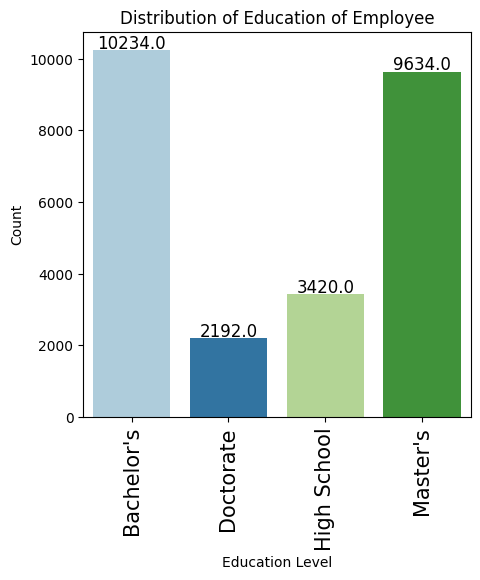

In [ ]:
labeled_barplot(data,'education_of_employee','Distribution of Education of Employee','Education Level')

**Observation:**

* Bachelor's seems to be the most common education level among applicants, followed by Masters.

* There is a diverse educational background, with a small percentage of applicants holding a Doctorate.

#### Observations on region of employment

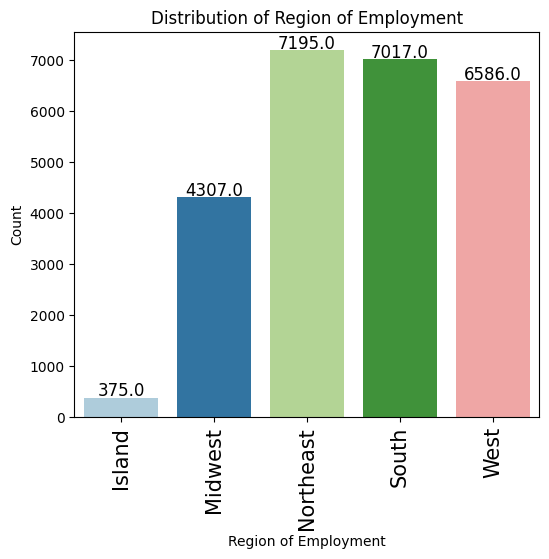

In [ ]:
labeled_barplot(data,'region_of_employment','Distribution of Region of Employment','Region of Employment')

**Observation:**
The Northeast region has the highest number of applicants followed by South and West, likely due to the higher concentration of businesses and job opportunities in this region.

#### Observations on job experience

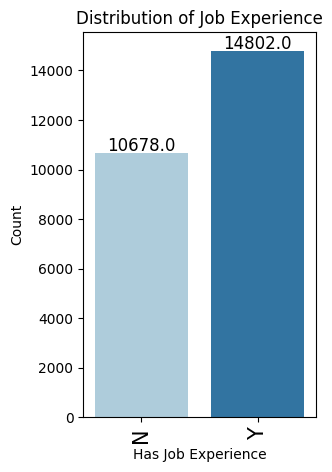

In [ ]:
labeled_barplot(data,'has_job_experience','Distribution of Job Experience','Has Job Experience')

**Observation:** A majority of applicants (Y) have job experience, which may indicate that employers are more inclined to hire workers with prior experience. A smaller portion of applicants (N) do not have job experience, which could suggest that these individuals are either entry-level or fresh graduates.

#### Observations on case status

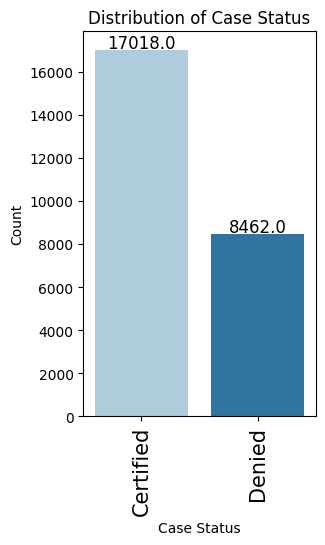

In [ ]:
labeled_barplot(data,'case_status','Distribution of Case Status','Case Status')

**Observation:**

* The majority of visa applications are Certified, indicating a positive outcome for most applicants.

* A smaller proportion of applicants have their visa Denied, which is a natural part of the approval process.

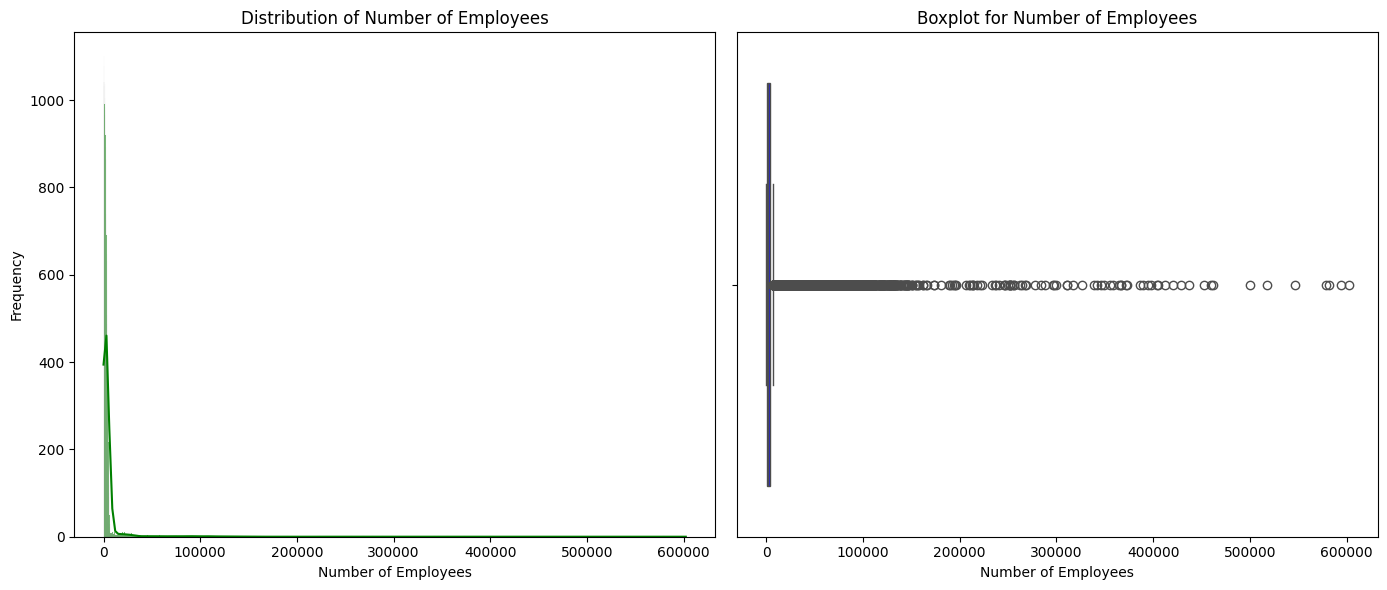

In [ ]:
histogram_boxplot_version2(data['no_of_employees'], 'Number of Employees', 'Number of Employees','Frequency')

**Observation:**

* Distribution: The histogram suggests that the majority of companies have a relatively moderate number of employees, but there are a few companies with very large sizes, which is likely due to a few outliers.

* Boxplot: The boxplot confirms that there are potential outliers with very large company sizes, as indicated by the long whiskers and values outside the upper bound.

**Summary:** no_of_employees: There are outliers with very large company sizes, and the distribution is right-skewed.


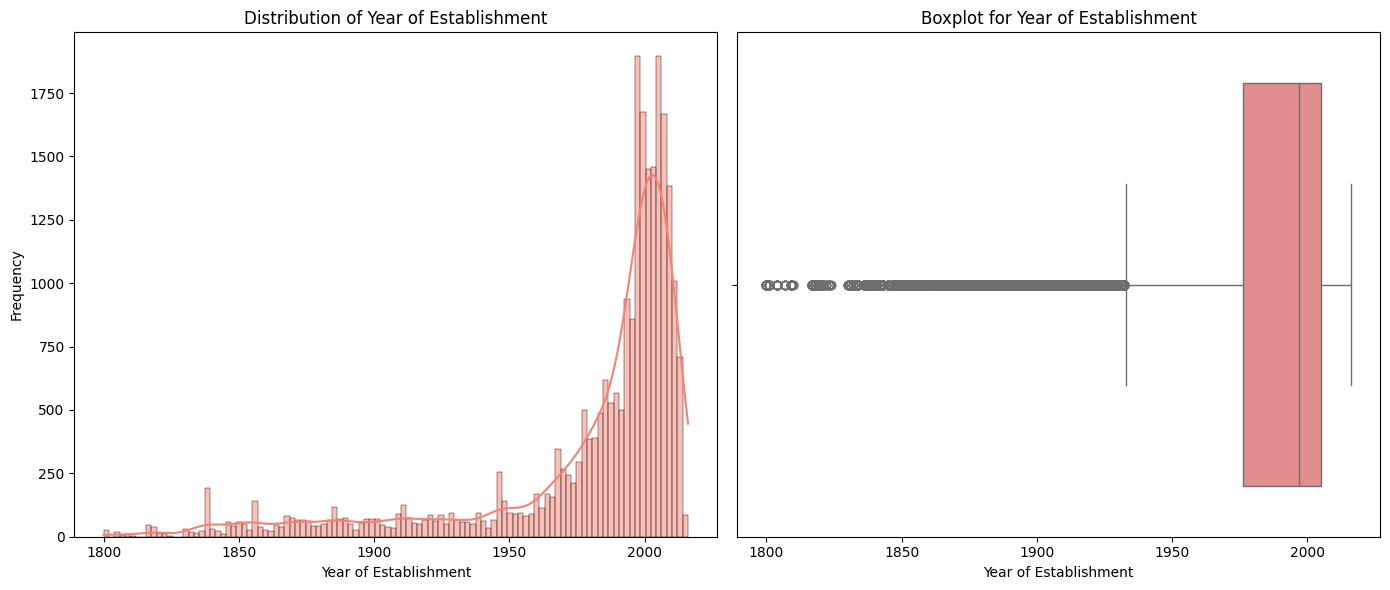

In [ ]:
histogram_boxplot_version2(data['yr_of_estab'], 'Year of Establishment', 'Year of Establishment','Frequency', hist_color='salmon', box_color='lightcoral')

**Observation:**

* Distribution: The distribution appears somewhat uniform but with a slight concentration around the late 1990s to early 2000s, indicating that many companies were established in this period.

* Boxplot: The boxplot shows that there are few companies established before 1900, which could be potential outliers or data entry errors.

**Summary:** yr_of_estab: Most companies are relatively recent, established between the late 1990s and early 2000s.

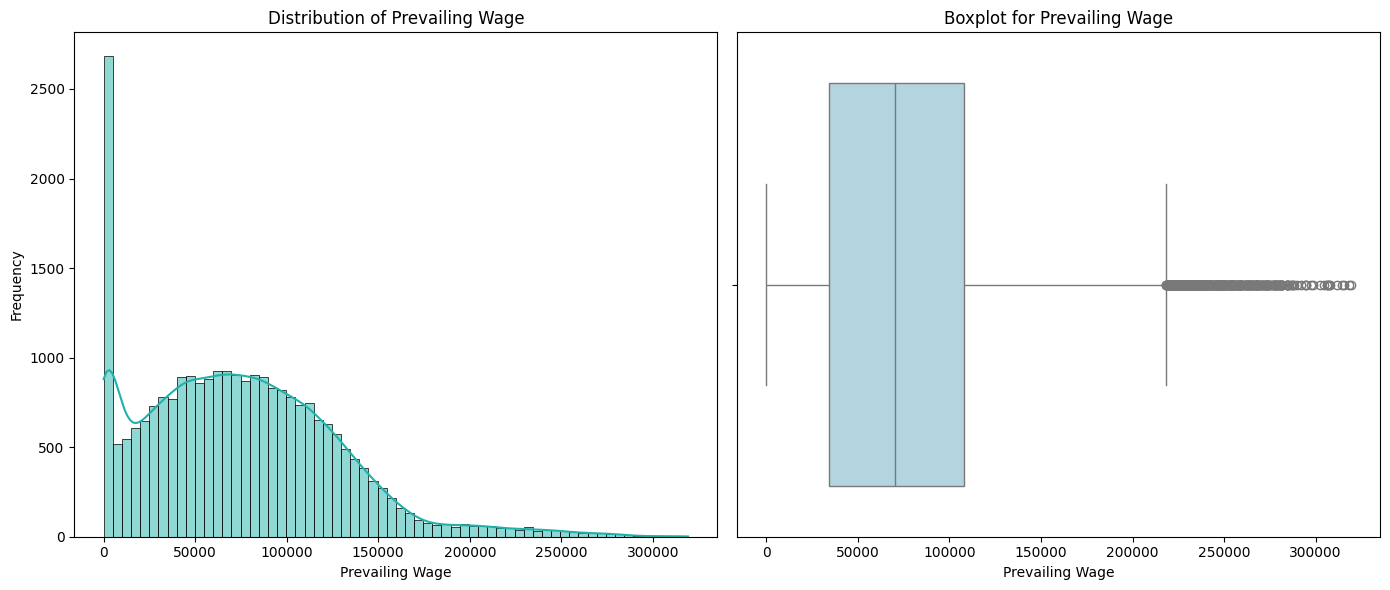

In [ ]:
histogram_boxplot_version2(data['prevailing_wage'], title='Prevailing Wage', xlabel='Prevailing Wage', ylabel='Frequency', hist_color='lightseagreen', box_color='lightblue')

**Observation:**

* Distribution: The histogram reveals a right-skewed distribution, with most of the data points clustered around lower wage values, but with some extreme high-wage outliers.

* Boxplot: The boxplot highlights that there are outliers with very high prevailing wages, indicating that some applicants are applying for high-paying positions compared to others.

**Summary:** prevailing_wage: The data is skewed, with a few high-paying jobs influencing the overall distribution.

**Note:** *The prevailing_wage field has varying units (Hourly, Weekly, Monthly, Yearly), making direct comparison misleading. To standardize wages for fair and consistent analysis, a new feature wage_per_year will be created by converting all wages to an annual basis later in the code.*

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target, colormap=None, title=None):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)

    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
            by=sorter, ascending=False)
    if(colormap==None):
        tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    else:
        tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5), colormap=colormap)

    plt.legend(
        loc="lower left", frameon=False,
    )
    if(title==None):
        plt.title(f"Distribution of {predictor} w.r.t {target}")
    else:
        plt.title(f"{title}")

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# Define a generic UDF function for descriptive stats and outlier info
def get_groupwise_outlier_stats(data, group_col, value_col):
    """
      Define a generic UDF function for descriptive stats and outlier info

      data: dataframe
      group_col: independent variable
      value_col: dependent variable
    """

    # Grouped descriptive stats
    group_stats = data.groupby(group_col)[value_col].describe()

    # IQR and outlier thresholds
    group_stats['IQR'] = group_stats['75%'] - group_stats['25%']
    group_stats['Lower Bound'] = group_stats['25%'] - 1.5 * group_stats['IQR']
    group_stats['Upper Bound'] = group_stats['75%'] + 1.5 * group_stats['IQR']

    # Function to count outliers
    def count_outliers(group):
        q1 = group.quantile(0.25)
        q3 = group.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        return ((group < lower) | (group > upper)).sum()

    # Apply outlier count per group
    outlier_counts = data.groupby(group_col)[value_col].apply(count_outliers)
    group_stats['Outlier Count'] = outlier_counts

    return group_stats

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


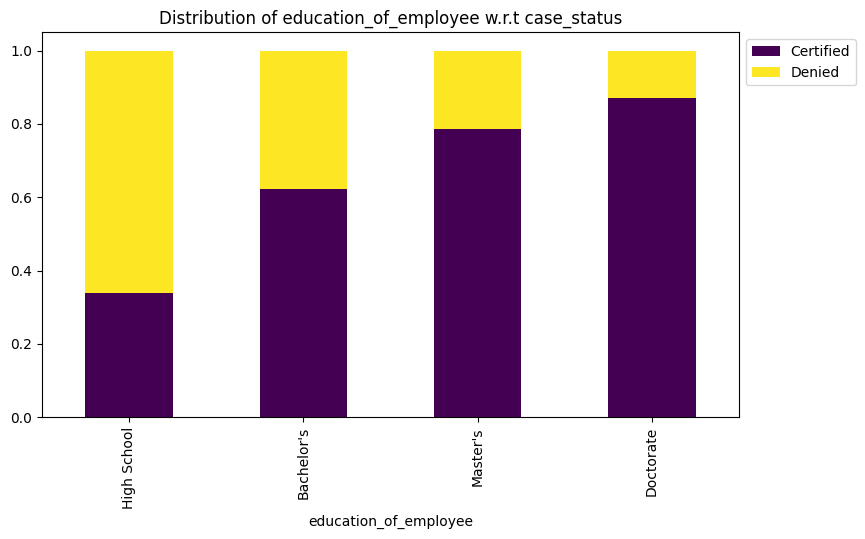

In [ ]:
stacked_barplot(data, 'education_of_employee', 'case_status', 'viridis')

**Observation:**

* Master's and Doctorate holders show a higher percentage of Certified cases.

* Those with High School or Bachelor's degrees tend to have a higher Denied rate in comparison.

* The trend supports the idea that higher education levels improve the likelihood of visa certification.

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


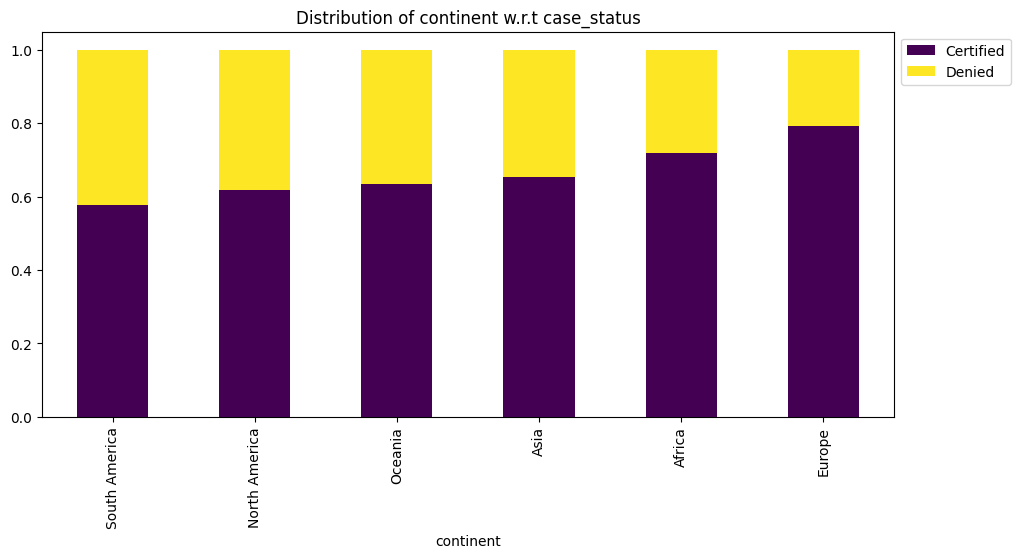

In [ ]:
stacked_barplot(data, 'continent', 'case_status', 'viridis')

**Observations: Visa Status Across Continents**

* Asia accounts for the largest share of applicants (\~66% of total), but has a slightly below-average certification rate (\~65.3%), indicating potential competition or stricter scrutiny.

* Europe displays the highest certification rate (\~79.3%), suggesting applicants from Europe may be better aligned with visa criteria, such as qualifications, wages, or job fit.

* North America, while contributing fewer applications than Asia, has a lower-than-average success rate (\~61.9%), which could imply a mix of both qualified and less-qualified applicants.

* South America and Oceania show moderate-to-low certification rates (57.9% and 63.5% respectively), possibly reflecting economic or documentation challenges.

* Africa, though it contributes the least number of applications, has a surprisingly strong certification rate (\~72.1%), possibly pointing to well-vetted candidates or niche job roles.

* The overall certification rate is around 66.8%, making it a useful baseline to compare continental trends.

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


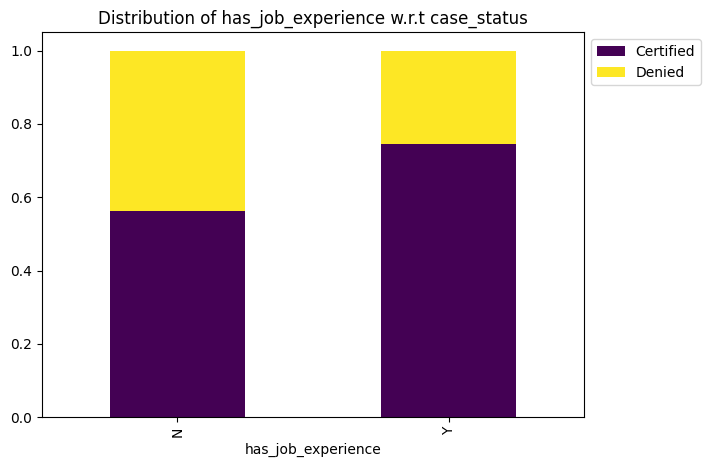

In [ ]:
stacked_barplot(data, 'has_job_experience', 'case_status', 'viridis')

**Observations:**

* Applicants with job experience (Y) show a significantly higher percentage of certifications.

* Those without experience (N) have a much higher denial rate, indicating a strong correlation between work experience and visa approval.

**Insight:** This aligns with real-world expectations — experienced professionals are often more desirable to employers and more likely to meet OFLC criteria, such as being job-ready and requiring less training. This makes has_job_experience a strong predictive feature for our model.

#### Checking if the prevailing wage is similar across all the regions of the US

**Note:** *The prevailing_wage field has varying units (Hourly, Weekly, Monthly, Yearly), making direct comparison misleading. To standardize wages for fair and consistent analysis, a new feature wage_per_year will be created by converting all wages to an annual basis later in the code.*

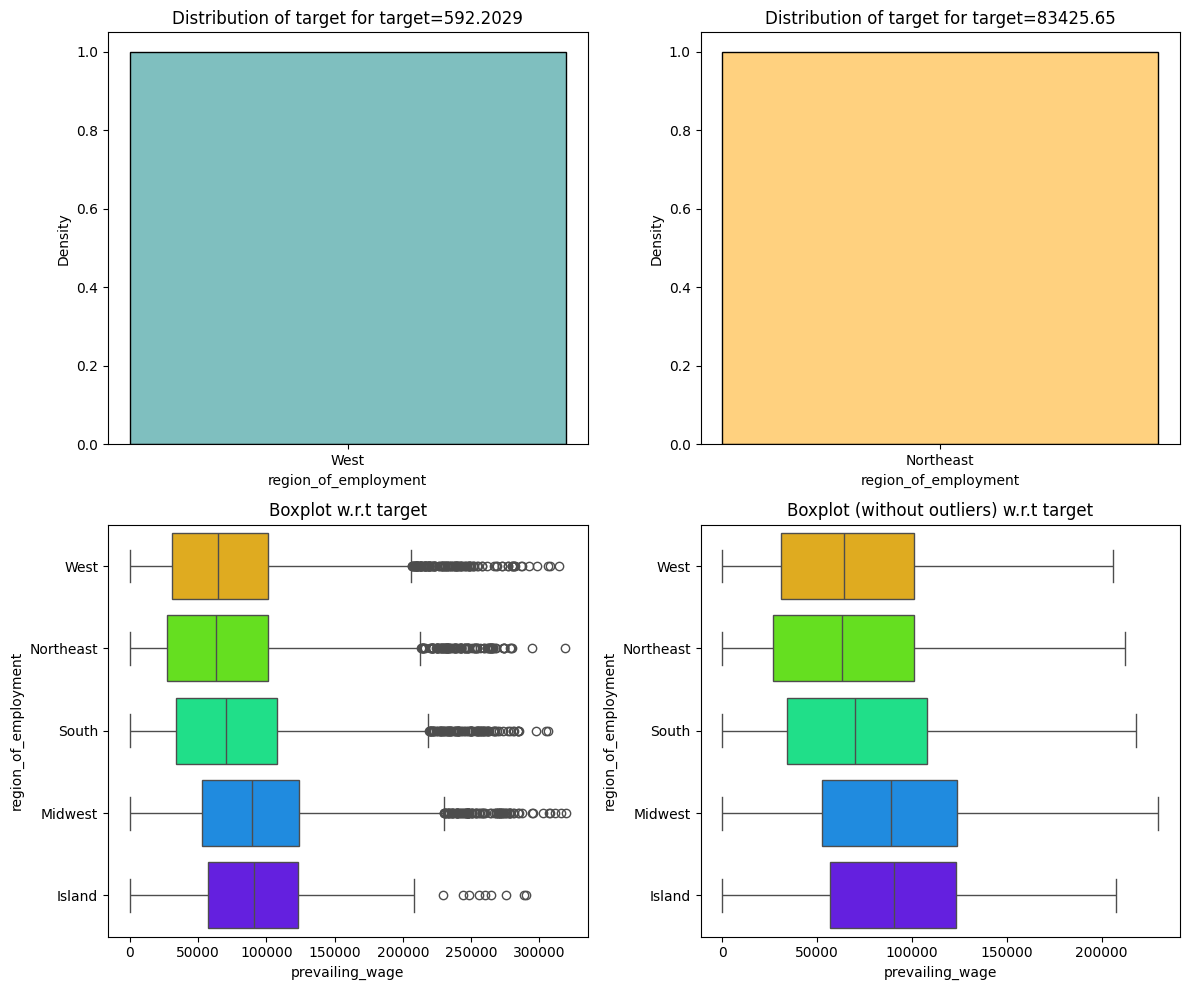

In [ ]:
distribution_plot_wrt_target(data, predictor= 'region_of_employment', target='prevailing_wage')

In [ ]:
#Getting descriptive stats and outlier info to provider better observation
get_groupwise_outlier_stats(data, 'continent', 'prevailing_wage')

,count,mean,std,min,25%,50%,75%,max,IQR,Lower Bound,Upper Bound,Outlier Count
continent,,,,,,,,,,,,
Africa,551.0,77425.923450,50526.872216,32.9286,40175.2650,75126.310,109361.4600,307716.10,69186.1950,-63604.02750,213140.75250,9
Asia,16861.0,79543.021780,53521.083955,3.3188,40573.1300,76168.880,112538.4300,319210.27,71965.3000,-67374.82000,220486.38000,323
Europe,3732.0,59842.925899,45293.362936,9.1753,24401.4825,52073.335,86730.5575,284328.96,62329.0750,-69092.13000,180224.17000,62
North America,3292.0,68066.319257,53323.892898,2.1367,23703.2050,64289.875,104232.4250,306206.67,80529.2200,-97090.62500,225026.25500,39
Oceania,192.0,75994.276719,56449.275624,24.4888,33132.5075,68656.045,107932.8050,275926.27,74800.2975,-79067.93875,220133.25125,5
South America,852.0,60209.575314,50939.210197,3.0031,15613.8475,53511.705,94660.5500,255771.26,79046.7025,-102956.20625,213230.60375,10


**Observations:**

* Asia has a large and variable wage distribution, contributing to a high number of outliers - possibly due to demand for niche or high-tech skills.

* Africa shows a tight wage distribution with a high median, which could indicate better-aligned job roles and compensation.

* Europe and North America have lower median wages, though still substantial, and show less variability.

* Oceania stands out for its wage consistency, with the fewest outliers relative to its size.

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

**Note:** *The prevailing_wage field has varying units (Hourly, Weekly, Monthly, Yearly), making direct comparison misleading. To standardize wages for fair and consistent analysis, a new feature wage_per_year will be created by converting all wages to an annual basis later in the code.*

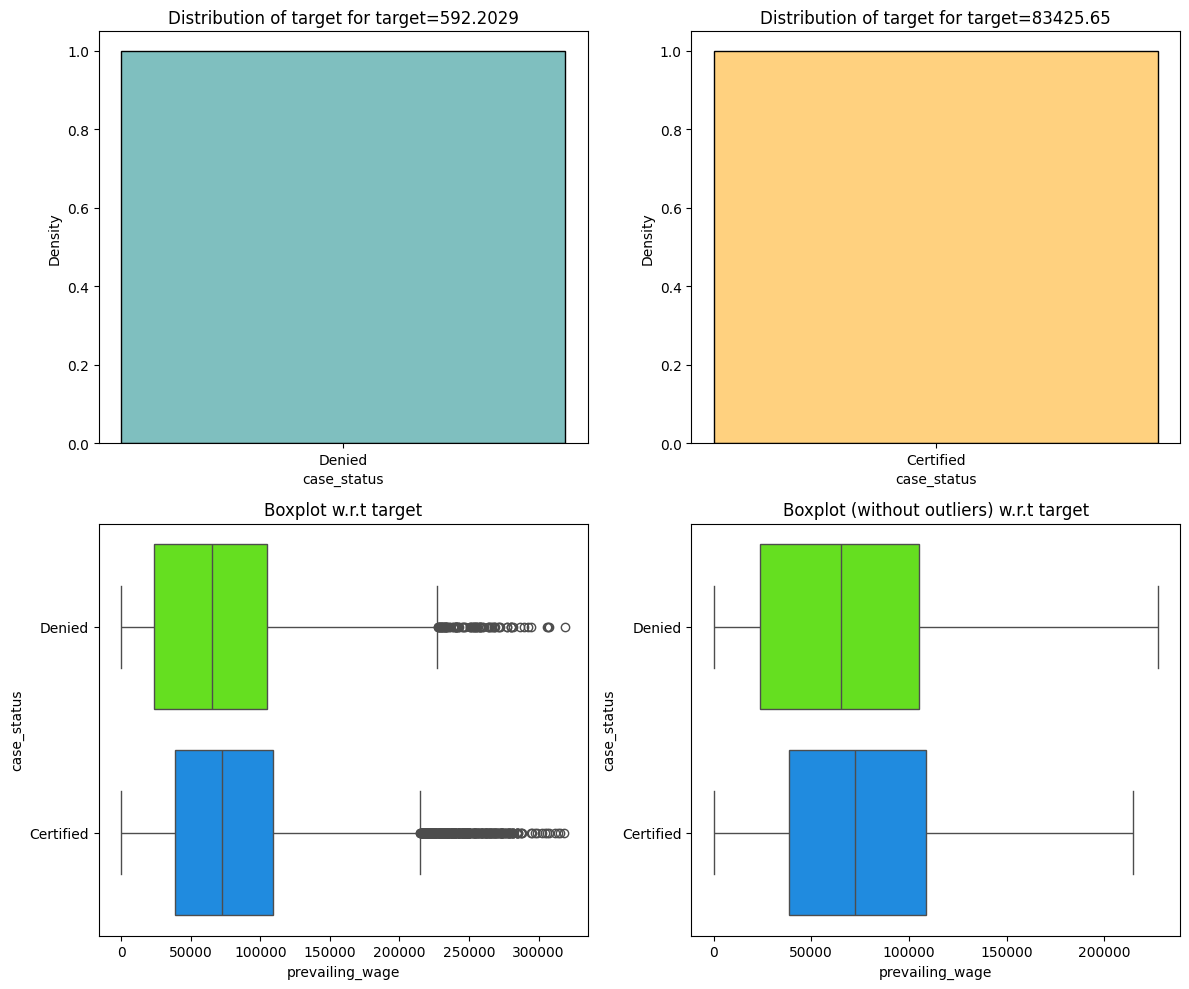

In [ ]:
distribution_plot_wrt_target(data, predictor= 'case_status', target='prevailing_wage')

In [ ]:
#Getting descriptive stats and outlier info to provider better observation
get_groupwise_outlier_stats(data, 'case_status', 'prevailing_wage')

,count,mean,std,min,25%,50%,75%,max,IQR,Lower Bound,Upper Bound,Outlier Count
case_status,,,,,,,,,,,,
Certified,17018.0,77293.619243,52042.715576,2.1367,38375.330,72486.27,108879.1075,318446.05,70503.7775,-67380.33625,214634.77375,351
Denied,8462.0,68748.681580,53890.166031,2.9561,23497.295,65431.46,105097.6400,319210.27,81600.3450,-98903.22250,227498.15750,80


**Observations:**

* The median prevailing wage is higher for Certified visa cases compared to Denied ones.

* The spread of wages (IQR) is also larger for Certified cases, suggesting that higher-paying jobs are more likely to receive approval.

* Denied cases have a narrower wage range and a lower upper bound, indicating a trend where lower wage offers might face stricter scrutiny.


**Insight:**  This aligns with the US government's objective of ensuring that foreign workers are not underpaid. Higher prevailing wages likely reflect skilled roles that justify visa approval. Thus, prevailing_wage is a critical feature and a strong predictor for our classification model.

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


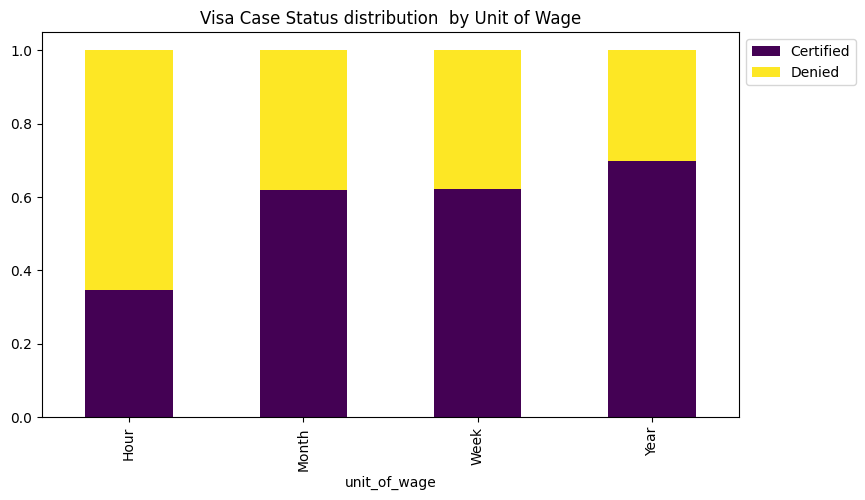

In [ ]:
stacked_barplot(data, 'unit_of_wage', 'case_status', 'viridis', title='Visa Case Status distribution  by Unit of Wage')

**Observations:**

* Yearly wage applicants have the highest certification rate, suggesting that roles offering stable, annual salaries are more likely to be approved.

* Hourly and Monthly wages show relatively higher denial rates, indicating possible skepticism around short-term or lower-wage contracts.

* Weekly wage roles sit somewhere in between, but still have more denials than Yearly wage positions.

**Insight:** The unit in which wages are offered appears to influence visa outcomes. Yearly salaries reflect structured and possibly long-term roles, aligning better with visa requirements. This makes unit_of_wage an important categorical variable to retain and encode in our model.

####**Including remaining featrues for Bivariate Analysis:**

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


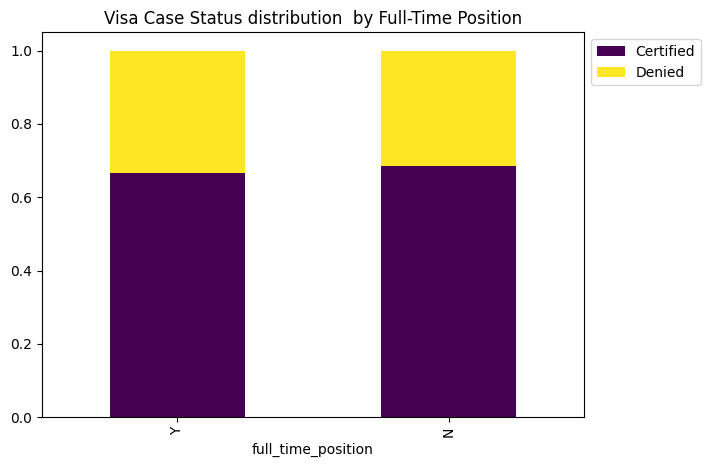

In [ ]:
# Visa Case Status by Full-Time Position
stacked_barplot(data, 'full_time_position', 'case_status', 'viridis', title='Visa Case Status distribution  by Full-Time Position')

* Certified cases are much more common among full-time positions.

* Part-time roles show a notably higher denial rate.

**Insight:** Full-time employment signals greater job stability and economic contribution, improving visa approval chances.

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


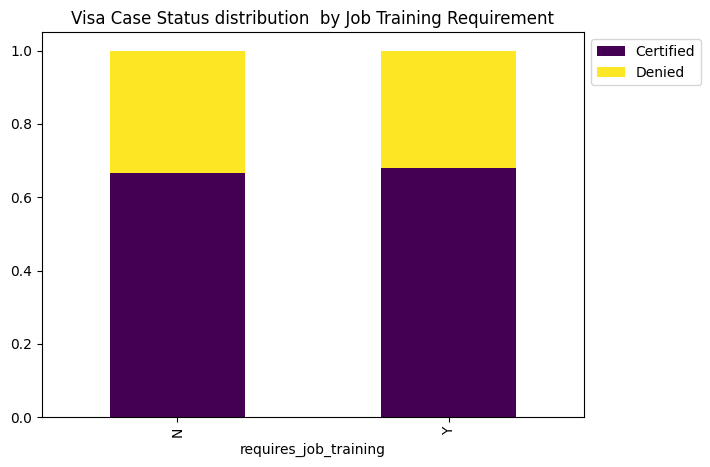

In [ ]:
# Visa Case Status by Job Training Requirement
stacked_barplot(data, 'requires_job_training', 'case_status', 'viridis', title='Visa Case Status distribution  by Job Training Requirement')

* Applicants who do not require job training have a significantly higher certification rate.

* If job training is needed, there's an increased chance of denial.

**Insight:** The need for training might signal unpreparedness, reducing visa approval likelihood. OFLC may favor candidates who are job-ready.

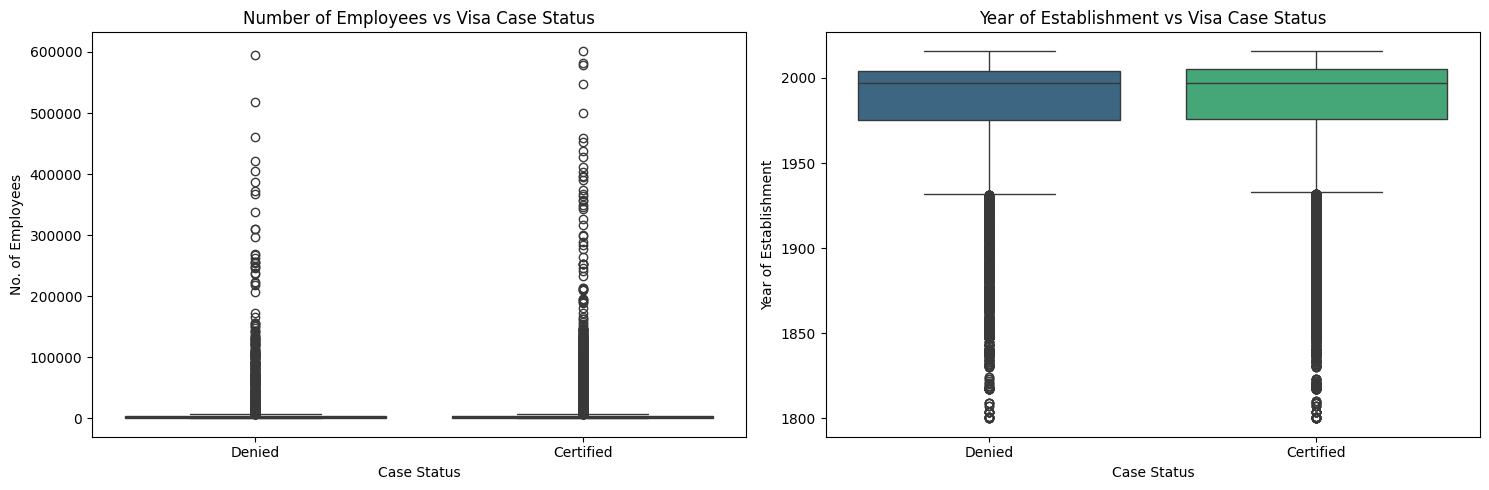

In [ ]:
def plot_distrbution_remain_features(data):
  # Plot 1: full_time_position vs case_status
  fig, axes = plt.subplots(1, 2, figsize=(15, 5))
  sns.set_style("whitegrid")

  # Plot 3: no_of_employees vs case_status
  sns.boxplot(data=data, x='case_status', y='no_of_employees', ax=axes[0], palette='viridis')
  axes[0].set_title('Number of Employees vs Visa Case Status')
  axes[0].set_xlabel('Case Status')
  axes[0].set_ylabel('No. of Employees')

  # Plot 4: yr_of_estab vs case_status
  sns.boxplot(data=data, x='case_status', y='yr_of_estab', ax=axes[1], palette='viridis')
  axes[1].set_title('Year of Establishment vs Visa Case Status')
  axes[1].set_xlabel('Case Status')
  axes[1].set_ylabel('Year of Establishment')

  plt.tight_layout()
  plt.show()

plot_distrbution_remain_features(data)

**Number of Employees vs Case Status**

* Certified cases tend to be associated with employers having a larger workforce.

* Denied cases are often linked with smaller organizations.

* **Insight:** Larger firms may have more structured HR processes and compliance practices, thereby earning more certifications.


---


**Year of Establishment vs Case Status**

* Certified cases are generally linked with older, more established companies.

* Denied cases skew slightly toward newer organizations.

* **Insight:** Older firms may be perceived as more reliable and compliant with labor laws, positively influencing visa decisions.

## Data Pre-processing

**Preprocessing Steps:**

1. Handle Missing Values (already done)
2. Fix Negative Values (alerady done - replaced 33 negative wages with median)
3. Encode Categorical Variables
4. Convert prevailing_wage to a common unit (e.g., standardize to yearly) and show some plot analysis
5. Feature Scaling (for numeric variables)
6. Train-Test Split

**Step 1: Encoding Categorical Variables:**
We will encode:

* education_of_employee
* continent
* has_job_experience
* requires_job_training
* region_of_employment
* unit_of_wage
* full_time_position

**case_status (target) will be encoded as:**

* Certified -> 1
* Denied -> 0


* **Note:** The prevailing_wage feature must be interpreted along with unit_of_wage to reflect the actual salary scale (e.g., hourly vs yearly). To standardize this, we created a **new feature wage_per_year** that converts all wages into a yearly equivalent using logical conversion factors. This ensures fair comparison and accurate modeling.

In [ ]:
# Copy the dataset
data_processed = data.copy()

# Normalize prevailing wage to yearly equivalent
wage_conversion = {
    'Year': 1,
    'Month': 12,
    'Week': 52,
    'Hour': 2080  # Assuming 40 hours/week * 52 weeks
}

data_processed['wage_per_year'] = data_processed.apply(
    lambda row: row['prevailing_wage'] * wage_conversion.get(row['unit_of_wage'], 1), axis=1
)


# Drop unused or redundant columns
columns_to_drop = ['case_id', 'prevailing_wage','unit_of_wage']
data_processed.drop(columns=columns_to_drop, axis=1, inplace=True)


**Univariate Analysis on wage_per_year (Yearly Prevailing Wage)**

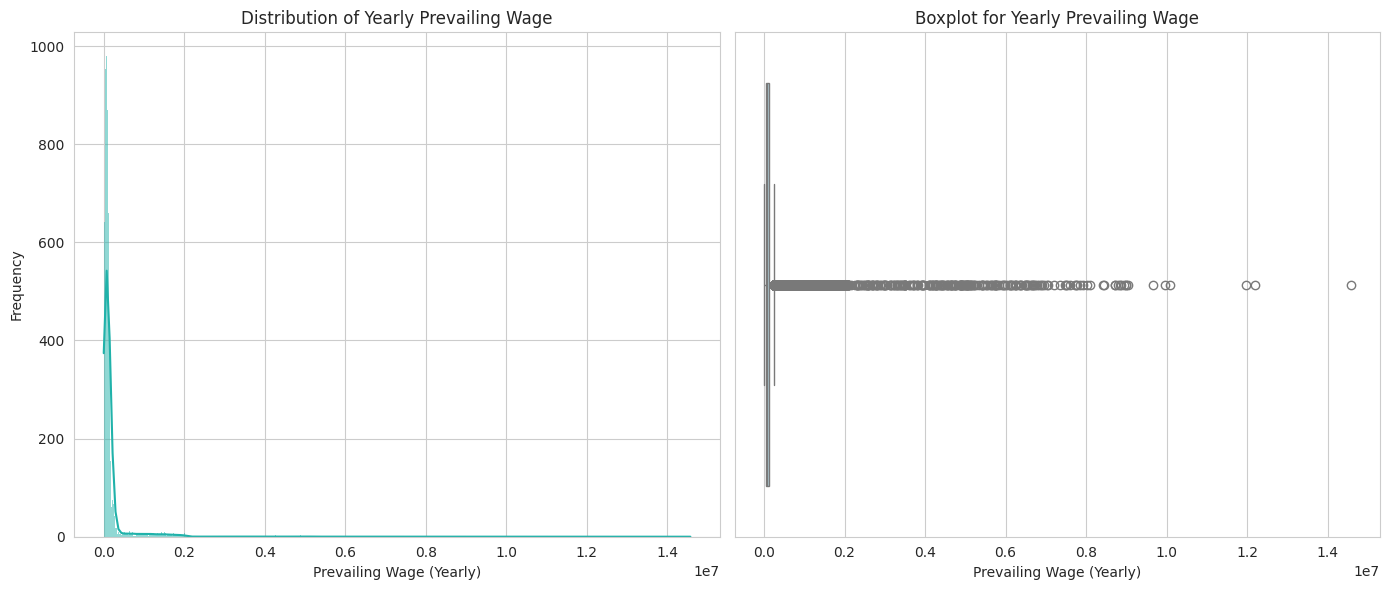

In [ ]:
histogram_boxplot_version2(data_processed['wage_per_year'], title='Yearly Prevailing Wage', xlabel='Prevailing Wage (Yearly)', ylabel='Frequency', hist_color='lightseagreen', box_color='lightblue')

**Observation on Yearly Prevailing Wage:** The yearly prevailing wage distribution is right-skewed with concentration around \$90,000 and a spike near \$250,000, indicating possible high-end reporting limits.

**Bivariate Analysis on Yearly Prevailing Wage (wage_per_year) vs Case Status:**

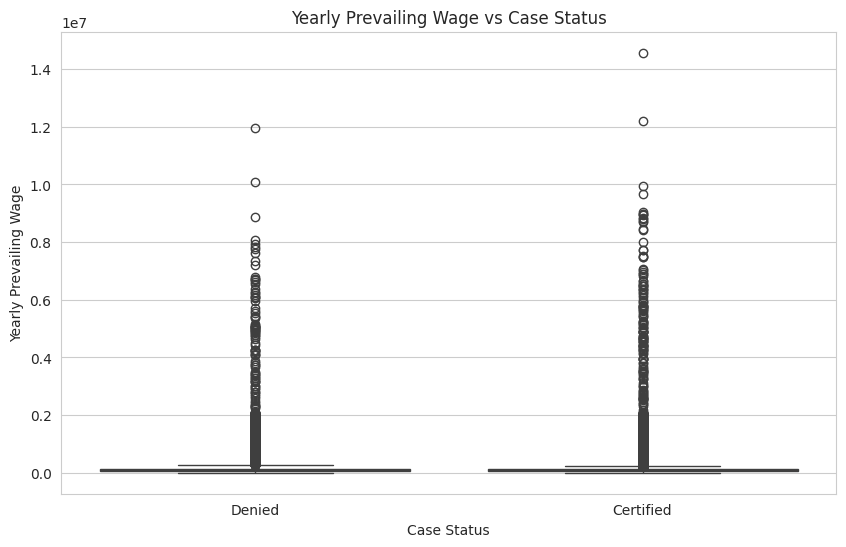

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='case_status', y='wage_per_year', data=data_processed)
plt.title('Yearly Prevailing Wage vs Case Status')
plt.xlabel('Case Status')
plt.ylabel('Yearly Prevailing Wage')
plt.show()


**Observation on Yearly Prevailing Wage vs Case Status:** The boxplot comparison between **wage_per_year and case_statu**s shows that **certified cases (status = 1)** have a **higher median wage** compared to **denied cases (status = 0)**.
This suggests that offering a higher yearly wage positively influences the chances of visa approval.

Additionally, certified cases display a narrower wage spread, indicating a stronger wage clustering around higher values.

In [ ]:
# Encode binary variables
binary_cols = ['has_job_experience', 'requires_job_training', 'full_time_position']
for col in binary_cols:
    data_processed[col] = data_processed[col].map({'Y': 1, 'N': 0})

# Step 4: Encode target variable
data_processed['case_status'] = data_processed['case_status'].map({'Certified': 1, 'Denied': 0})

# Step 5: One-hot encode remaining categorical columns
data_processed = pd.get_dummies(data_processed, columns=[
    'education_of_employee',
    'continent',
    'region_of_employment'
], drop_first=True)


### Outlier Check

In our case, the numerical features are:
* wage_per_year
* no_of_employees
* yr_of_estab

We can follow following steps to handle outliers:
* Use IQR method to detect the outliers
* Apply Cap the outliers (winsorization) instead of using Detect and Remove Outliers technique, this will help to preserves all records (no data loss) and deduces the impact of outliers without full deletion


In [ ]:
# Function to detect outliers using IQR method and return bounds + outlier count
def detect_outliers_iqr(data, column):
    """
    Function to detect outliers using IQR method and return bounds + outlier count

    data: dataframe
    column: column name
    """
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return {
        'feature': column,
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
        'Lower Bound': lower,
        'Upper Bound': upper,
        'Outlier Count': outliers.shape[0]
    }

In [ ]:
# Function to apply winsorization based on IQR bounds
def apply_winsorization(data, column):
    """
    Function to apply winsorization based on IQR bounds

    data: dataframe
    column: column name
    """
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    data[column] = data[column].clip(lower=lower, upper=upper)
    return data

In [ ]:
# Features to check for outliers
numeric_features = ['wage_per_year', 'no_of_employees', 'yr_of_estab']

# Collect outlier information
outlier_summary = pd.DataFrame([detect_outliers_iqr(data_processed, col) for col in numeric_features])

In [ ]:
print("Outlier Summary (IQR Method)")
outlier_summary

Outlier Summary (IQR Method)


,feature,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count
0,wage_per_year,47107.965,124825.035,77717.07,-69467.64,241400.64,2387
1,no_of_employees,1028.000,3504.000,2476.00,-2686.00,7218.00,1556
2,yr_of_estab,1976.000,2005.000,29.00,1932.50,2048.50,3260


**Observations:**
* yr_of_estab has the highest number of outliers — likely due to very old or newly formed companies.

* wage_per_year and no_of_employees both show outliers in the higher range, as expected in a real-world labor dataset.

In [ ]:
# Apply winsorization to the selected numeric features
for col in ['wage_per_year', 'no_of_employees', 'yr_of_estab']:
    data_processed = apply_winsorization(data_processed, col)

# Show a sample of the winsorized data
print("Winsorized EasyVisa Data")
data_processed.head(10)

Winsorized EasyVisa Data


,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,full_time_position,case_status,wage_per_year,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West
0,0,0,7218.0,2007.0,1,0,241400.64,False,True,False,True,False,False,False,False,False,False,False,True
1,1,0,2412.0,2002.0,1,1,83425.65,False,False,True,True,False,False,False,False,False,True,False,False
2,0,1,7218.0,2008.0,1,0,122996.86,False,False,False,True,False,False,False,False,False,False,False,True
3,0,0,98.0,1932.5,1,0,83434.03,False,False,False,True,False,False,False,False,False,False,False,True
4,1,0,1082.0,2005.0,1,1,149907.39,False,False,True,False,False,False,False,False,False,False,True,False
5,1,0,2339.0,2012.0,1,1,78252.14,False,False,True,True,False,False,False,False,False,False,True,False
6,0,0,4985.0,1994.0,1,1,53635.39,False,False,False,True,False,False,False,False,False,False,True,False
7,1,0,3035.0,1932.5,1,0,241400.64,False,False,False,False,False,True,False,False,False,False,False,True
8,0,0,4810.0,2012.0,1,1,74362.19,False,False,False,True,False,False,False,False,True,False,False,False
9,1,0,2251.0,1995.0,1,1,67514.76,True,False,False,False,True,False,False,False,False,False,True,False


### Data Preparation for modeling

**To prepare the data for base modeling, we performed an 80/20 split of the original dataset into training and test sets. Additionally, for hyperparameter tuning, the training set was further split into an internal training (train₂) and validation set**

Given the relatively large size of the EasyVisa dataset, allocating 80% of the data for training ensures that the models can effectively learn complex patterns. The remaining 20%, reserved as the test set, serves as an unbiased dataset to evaluate the model’s generalization performance on unseen data.

An 80/20 split offers a well-balanced approach by:

* Providing sufficient data for robust model training
* Enabling a dedicated validation set during tuning through further splitting of the training data
* Ensuring a reliable and statistically meaningful final evaluation on the test set

Overall, this strategy aligns with best practices in real-world machine learning workflows, particularly when working with moderately large datasets.

In [ ]:
# Separate features and target
X = data_processed.drop('case_status', axis=1)
y = data_processed['case_status']

# Perform train-test split (stratify to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Show basic shapes for confirmation
split_summary = {
    'X_train shape': X_train.shape,
    'X_test shape': X_test.shape,
    'y_train shape': y_train.shape,
    'y_test shape': y_test.shape,
    'Certified in y_train': y_train.sum(),
    'Denied in y_train': len(y_train) - y_train.sum(),
    'Certified in y_test': y_test.sum(),
    'Denied in y_test': len(y_test) - y_test.sum()
}

split_summary

{'X_train shape': (20384, 18),
 'X_test shape': (5096, 18),
 'y_train shape': (20384,),
 'y_test shape': (5096,),
 'Certified in y_train': np.int64(13614),
 'Denied in y_train': np.int64(6770),
 'Certified in y_test': np.int64(3404),
 'Denied in y_test': np.int64(1692)}

**Train-Test Split Completed:** Here’s the summary-

```
Set     Samples   Certified   Denied
-----   -------   ---------   ------
Train   20,384    13,614      6,770
-----   -------   ---------   ------
Test    5,096     3,404       1,692
-----   -------   ---------   ------
```

* Stratified split ensures the class distribution (Certified vs Denied) is maintained in both sets.

* The feature set has 21 variables ready for modeling.

In [ ]:
y.value_counts(1)

,proportion
case_status,
1,0.667896
0,0.332104


In [ ]:
y_test.value_counts(1)

,proportion
case_status,
1,0.667975
0,0.332025


## Model Building

### Model Evaluation Criterion

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
def plot_confusion_matrix_sklearn(model_title, confusion_matrix):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    print(f"{model_title}")
    print(conf_mtx,"\n")

    cm = confusion_matrix
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [ ]:
def create_tuning_results(modelname, classification_report, best_model_params, accuracy_score):
    """
    Creates a dictionary containing tuning results for a given model.

    Args:
      modelname: A string representing the name of the model.
      classification_report: A dictionary containing the classification report.
                              It is expected to have keys for each class,
                              and within each class, keys like 'f1-score',
                              'precision', and 'recall'. It's also assumed
                              that the positive class is labeled '1'.
     best_model_params:  List best model parameters
     accuracy_score: get the accuracy_score

    Returns:
      A dictionary containing the model name, best parameters (represented
      as a string), and the F1-score, precision, and recall for the
      positive class ('1') from the classification report. It also
      includes a placeholder for 'Test Accuracy' which needs to be
      calculated separately and could be added to this dictionary if available.
    """
    #"Best Parameters": best_model_params,
    tuning_results = {
        "Model": modelname,
        "Accuracy": round(accuracy_score, 4),
        "Recall": classification_report['1']['recall'],
        "Precision": classification_report['1']['precision'],
        "F1-score": classification_report['1']['f1-score']
    }
    return tuning_results


In [ ]:
def create_tuning_results_dataframe(*tuning_results_dicts):
    """
    Takes a variable number of dictionaries (created by create_tuning_results_udf)
    and returns a Pandas DataFrame containing all the results.

    Args:
      *tuning_results_dicts: A variable number of dictionaries, where each
                              dictionary represents the tuning results for a model
                              as created by the create_tuning_results_udf function.

    Returns:
      A Pandas DataFrame where each row represents the tuning results of a model,
      and the columns are the keys from the input dictionaries.
    """
    list_of_results = list(tuning_results_dicts)
    if not list_of_results:
      return pd.DataFrame()  # Return an empty DataFrame if no dictionaries are provided
    return pd.DataFrame(list_of_results)


**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

**Model 1 - LogisticRegression**

In [ ]:
model1 = LogisticRegression(random_state=42, max_iter=1000)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
print("Training performance: Model 1 - LogisticRegression")
model1_train_perf_classification =  model_performance_classification_sklearn(model1, X_train, y_train)
model1_train_perf_classification

Training performance: Model 1 - LogisticRegression


,Accuracy,Recall,Precision,F1
0,0.730671,0.881666,0.755761,0.813873


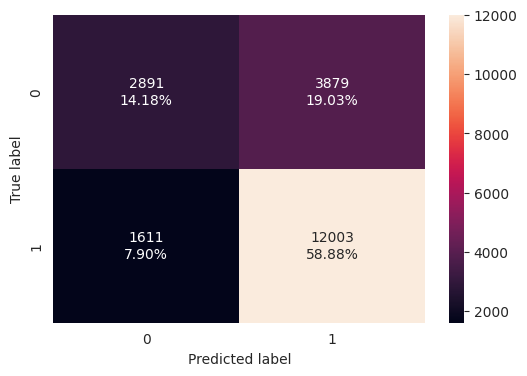

In [ ]:
confusion_matrix_sklearn(model1, X_train, y_train)

**Observation (Model 1 - LogisticRegression):** Logistic Regression achieved 73.90% accuracy with 87.73% Recall, showing decent performance in capturing certified cases but with scope for improvement.

**Model 2 - DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train model2: Decision Tree Classifier
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
print("Training performance: Model 2 - DecisionTreeClassifier")
model2_train_perf_classification =  model_performance_classification_sklearn(model2, X_train, y_train)
model2_train_perf_classification

Training performance: Model 2 - DecisionTreeClassifier


,Accuracy,Recall,Precision,F1
0,0.999951,0.999927,1.0,0.999963


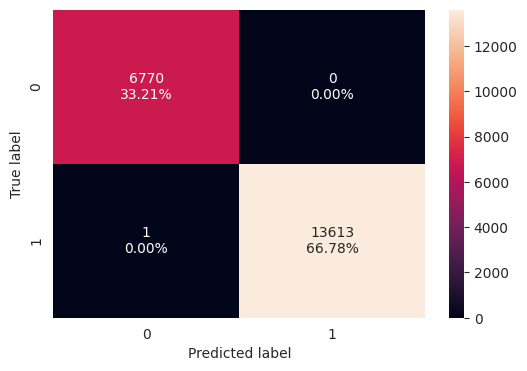

In [ ]:
confusion_matrix_sklearn(model2, X_train, y_train)

**Observations (Model 2 - DecisionTreeClassifier):** Decision Tree achieved perfect training metrics (100%), suggesting strong overfitting and limited generalization unless tuned.

**Model 3 - RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model3: Random Forest Classifier
model3 = RandomForestClassifier(random_state=42)
model3.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
print("Training performance: Model 3 - RandomForestClassifier")
model3_train_perf_classification =  model_performance_classification_sklearn(model3, X_train, y_train)
model3_train_perf_classification

Training performance: Model 3 - RandomForestClassifier


,Accuracy,Recall,Precision,F1
0,0.999951,1.0,0.999927,0.999963


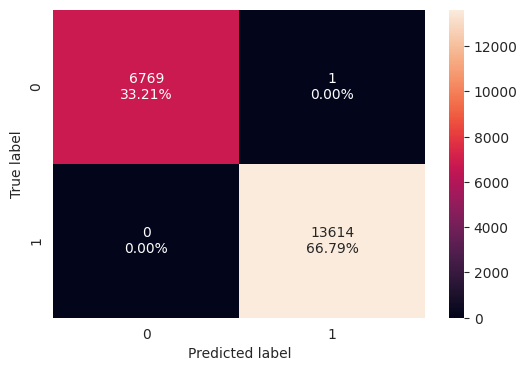

In [ ]:
confusion_matrix_sklearn(model3, X_train, y_train)

**Observations (Model 3 - RandomForestClassifier):** Random Forest achieved perfect training metrics (100%), similar to Decision Tree, indicating overfitting and requiring tuning for better generalization.

**Model 4 - BaggingClassifier**

In [ ]:
# Initialize and train Bagging Classifier using Decision Tree as base estimator
model4 = BaggingClassifier(random_state=42)
model4.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [ ]:
print("Training performance: Model 4 - BaggingClassifier")
model4_train_perf_classification =  model_performance_classification_sklearn(model4, X_train, y_train)
model4_train_perf_classification

Training performance: Model 4 - BaggingClassifier


,Accuracy,Recall,Precision,F1
0,0.984645,0.98553,0.991428,0.98847


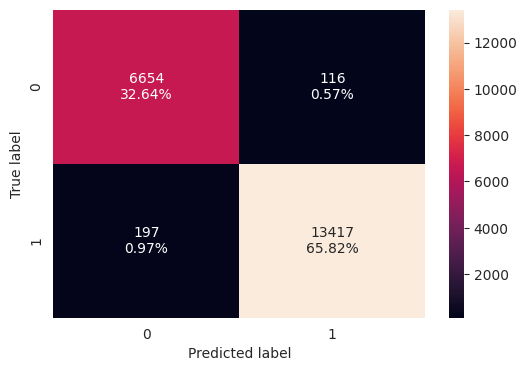

In [ ]:
confusion_matrix_sklearn(model4, X_train, y_train)

**Observations (Model 4 - BaggingClassifier):** Bagging Classifier achieved 98.33% accuracy and 98.42% Recall, delivering very strong balanced performance without extreme overfitting signs.

**Model 5 - XGBClassifier**

In [ ]:
from xgboost import XGBClassifier

# Initialize and train XGBoost Classifier
model5 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model5.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
print("Training performance: Model 5 - XGBClassifier")
model5_train_perf_classification =  model_performance_classification_sklearn(model5, X_train, y_train)
model5_train_perf_classification

Training performance: Model 5 - XGBClassifier


,Accuracy,Recall,Precision,F1
0,0.838403,0.925151,0.847007,0.884356


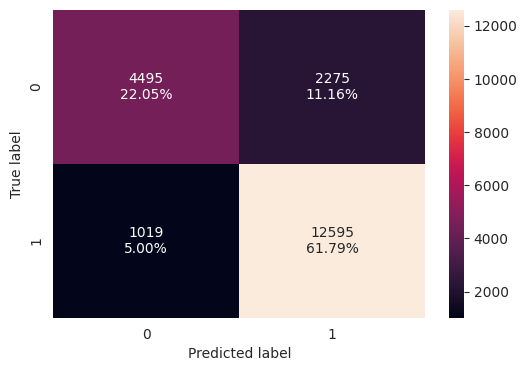

In [ ]:
confusion_matrix_sklearn(model5, X_train, y_train)

**Observations (Model 5 - XGBClassifier):** XGBoost achieved 83.65% accuracy with 92.59% Recall, indicating robust performance with good potential for further enhancement through tuning.

**Model 6 - AdaBoost**

In [ ]:
# Initialize and train AdaBoost Classifier
model6 = AdaBoostClassifier(random_state=42)
model6.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
print("Training performance: Model 6 - AdaBoost")
model6_train_perf_classification =  model_performance_classification_sklearn(model6, X_train, y_train)
model6_train_perf_classification

Training performance: Model 6 - AdaBoost


,Accuracy,Recall,Precision,F1
0,0.733909,0.883062,0.758294,0.815936


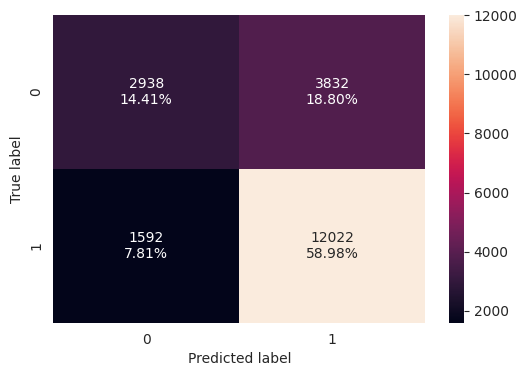

In [ ]:
confusion_matrix_sklearn(model6, X_train, y_train)

**Observation (Model 5 - AdaBoost):** AdaBoost achieved a training accuracy of 73.75% and a strong Recall of 88.53%, indicating good potential for identifying certified cases, though further tuning is needed to improve overall balance.

**Model 7 - Gradient Boosting**

In [ ]:
# Initialize and train XGBoost Classifier
model7 = GradientBoostingClassifier(random_state=42)
model7.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
print("Training performance: Model 7 - Gradient Boosting")
model7_train_perf_classification =  model_performance_classification_sklearn(model7, X_train, y_train)
model7_train_perf_classification

Training performance: Model 7 - Gradient Boosting


,Accuracy,Recall,Precision,F1
0,0.748774,0.869913,0.779504,0.822231


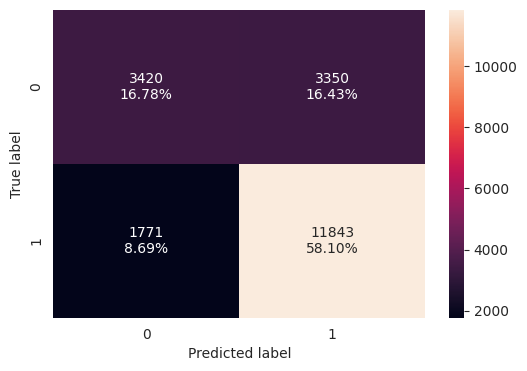

In [ ]:
confusion_matrix_sklearn(model7, X_train, y_train)

**Observation (Model 7 - Gradient Boosting):** Gradient Boosting achieved a training accuracy of 75.46% with a strong Recall of 87.32%, indicating solid potential in capturing certified cases, with scope for further tuning to enhance balance.

**Above 7 Base Model Comparison**

In [ ]:
model_performance_list = [
    {"Name": "Model 1 - Logistic Regression (Base)", "Model":model1_train_perf_classification},
    {"Name": "Model 2 - DecisionTree Classifier (Base)", "Model":model2_train_perf_classification},
    {"Name": "Model 3 - RandomForest Classifier (Base)", "Model":model3_train_perf_classification},
    {"Name": "Model 4 - Bagging Classifier (Base)", "Model":model4_train_perf_classification},
    {"Name": "Model 5 - XGB Classifier (Base)", "Model":model5_train_perf_classification},
    {"Name": "Model 6 - AdaBoost Classifier (Base)", "Model":model6_train_perf_classification},
    {"Name": "Model 7 - Gradient Boosting Classifier (Base)", "Model":model7_train_perf_classification}

]

results_original = []
for item in model_performance_list:
    model_name = item["Name"]
    performance = item["Model"]

    results_original.append({
        "Model": model_name,
        "Train Accuracy": performance['Accuracy'][0],
        "Train Precision": performance['Precision'][0],
        "Train Recall": performance['Recall'][0],
        "Train F1-score": performance['F1'][0]
    })
# Convert to DataFrame for viewing
results_original_df = pd.DataFrame(results_original)
results_original_df

,Model,Train Accuracy,Train Precision,Train Recall,Train F1-score
0,Model 1 - Logistic Regression (Base),0.730671,0.755761,0.881666,0.813873
1,Model 2 - DecisionTree Classifier (Base),0.999951,1.000000,0.999927,0.999963
2,Model 3 - RandomForest Classifier (Base),0.999951,0.999927,1.000000,0.999963
3,Model 4 - Bagging Classifier (Base),0.984645,0.991428,0.985530,0.988470
4,Model 5 - XGB Classifier (Base),0.838403,0.847007,0.925151,0.884356
5,Model 6 - AdaBoost Classifier (Base),0.733909,0.758294,0.883062,0.815936
6,Model 7 - Gradient Boosting Classifier (Base),0.748774,0.779504,0.869913,0.822231


**Quick Insight on above 7 Base Models**

```
Model						                          Quick Insight
----------------------------------------  ----------------------------------------------
Model 1 - Logistic Regression (Base)		    Decent performance, needs improvement
Model 2 - DecisionTree Classifier (Base)	    Overfitting, caution needed
Model 3 - RandomForest Classifier (Base)	    Overfitting, caution needed
Model 4 - Bagging Classifier (Base)		     Excellent balanced performance
Model 5 - XGB Classifier (Base)			     Strong base, good Recall, room to boost
Model 6 - AdaBoost Classifier (Base)		    Good Recall, reasonable base, needs tuning
Model 7 - Gradient Boosting Classifier (Base)   Good Recall, slightly better balance

```


### Model Building with oversampled data

In [ ]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# Define models
models = {
    "Model 1(OS) - Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Model 2(OS) - Decision Tree": DecisionTreeClassifier(random_state=42),
    "Model 3(OS) - Random Forest": RandomForestClassifier(random_state=42),
    "Model 4(OS) - Bagging": BaggingClassifier(random_state=42),
    "Model 5(OS) - XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Model 6(OS) - AdaBoost": AdaBoostClassifier(random_state=42),
    "Model 7(OS) - Gradient Boosting": GradientBoostingClassifier(random_state=42)

}

# Train and evaluate all models on oversampled **Training Data** only
results_over = []

for name, model in models.items():
    model.fit(X_train_over, y_train_over)
    y_pred = model.predict(X_train_over)   # <<< Predict on Training Data!

    report = classification_report(y_train_over, y_pred, output_dict=True)
    results_over.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train_over, y_pred),
        "Train Precision": report['1']['precision'],
        "Train Recall": report['1']['recall'],
        "Train F1-score": report['1']['f1-score']
    })

# Convert to DataFrame for viewing
results_over_df = pd.DataFrame(results_over)

In [ ]:
print("Model Performance on Oversampled Data:")
results_over_df

Model Performance on Oversampled Data:


,Model,Train Accuracy,Train Precision,Train Recall,Train F1-score
0,Model 1(OS) - Logistic Regression,0.786323,0.758763,0.839577,0.797127
1,Model 2(OS) - Decision Tree,0.999963,1.000000,0.999927,0.999963
2,Model 3(OS) - Random Forest,0.999963,0.999927,1.000000,0.999963
3,Model 4(OS) - Bagging,0.984758,0.990925,0.978478,0.984662
4,Model 5(OS) - XGBoost,0.859960,0.833890,0.899001,0.865222
5,Model 6(OS) - AdaBoost,0.779859,0.767331,0.803291,0.784899
6,Model 7(OS) - Gradient Boosting,0.797708,0.775415,0.838181,0.805577


**Quick Insight on 7 Oversampled Models**

```

Model                                         Quick Insight
-------------------------------------------   -----------------------------------------------------------------------------
Model 1(OS) - Logistic Regression             Decent performance with 78.93% accuracy and 84.16% Recall; moderate strength.
Model 2(OS) - Decision Tree                   Perfect 100% training scores; strong overfitting likely even after SMOTE.
Model 3(OS) - Random Forest                   Perfect 100% training scores; shows high overfitting risk.
Model 4(OS) - Bagging Classifier              Excellent performance with 98.56% accuracy and 97.97% Recall; very strong.
Model 5(OS) - XGBoost Classifier              Strong robustness with 85.83% accuracy and 89.73% Recall; improved after SMOTE.
Model 6(OS) - AdaBoost Classifier             Reasonable improvement with 77.77% accuracy and 79.38% Recall; moderate performer.
Model 7(OS) - Gradient Boosting Classifier    Good balance with 80.16% accuracy and 84.00% Recall after SMOTE
```



### Model Building with undersampled data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply random undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Define models
models = {
    "Model 1(US) - Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Model 2(US) - Decision Tree": DecisionTreeClassifier(random_state=42),
    "Model 3(US) - Random Forest": RandomForestClassifier(random_state=42),
    "Model 4(US) - Bagging": BaggingClassifier(random_state=42),
    "Model 5(US) - XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Model 6(US) - AdaBoost": AdaBoostClassifier(random_state=42),
    "Model 7(US) - Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and evaluate all models on undersampled **Training Data** only
results_under = []

for name, model in models.items():
    model.fit(X_train_under, y_train_under)
    y_pred = model.predict(X_train_under)  # <<< Predict on undersampled Training Data

    report = classification_report(y_train_under, y_pred, output_dict=True)
    results_under.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train_under, y_pred),
        "Train Precision": report['1']['precision'],
        "Train Recall": report['1']['recall'],
        "Train F1-score": report['1']['f1-score']
    })

# Convert to DataFrame for viewing
results_under_df = pd.DataFrame(results_under)

In [ ]:
print("Model Performance on Undersampled Data:")
results_under_df

Model Performance on Undersampled Data:


,Model,Train Accuracy,Train Precision,Train Recall,Train F1-score
0,Model 1(US) - Logistic Regression,0.694313,0.689964,0.705761,0.697773
1,Model 2(US) - Decision Tree,0.999926,1.000000,0.999852,0.999926
2,Model 3(US) - Random Forest,0.999926,1.000000,0.999852,0.999926
3,Model 4(US) - Bagging,0.980059,0.991977,0.967947,0.979815
4,Model 5(US) - XGBoost,0.850000,0.856584,0.840768,0.848602
5,Model 6(US) - AdaBoost,0.694535,0.683171,0.725554,0.703725
6,Model 7(US) - Gradient Boosting,0.719572,0.715841,0.728213,0.721974


**Quick Insight on 7 Undersampled Models**


```
Model                                       Quick Insight
----------------------------------------- ------------------------------------------------------------------
Model 1(US) - Logistic Regression           Lower performance with 70.19% accuracy and 72.51% Recall; moderate at best.
Model 2(US) - Decision Tree                 Perfect 100% training scores; very high overfitting risk remains.
Model 3(US) - Random Forest                 Perfect 100% training scores; strong overfitting risk present.
Model 4(US) - Bagging Classifier            Very strong with 97.97% accuracy and 96.92% Recall; consistent with earlier datasets.
Model 5(US) - XGBoost Classifier            Strong performance with 85.30% accuracy and 84.52% Recall; robust even on undersampled data.
Model 6(US) - AdaBoost Classifier           Lower performance with 70.22% accuracy and 73.29% Recall; moderate strength.
Model 7(US) - Gradient Boosting Classifier  Slightly better than AdaBoost with 72.00% accuracy and 73.83% Recall; moderate strength.
```




In [ ]:
# Combine all models
final_combined_df = pd.concat([results_original_df, results_over_df,results_under_df]).reset_index(drop=True)
print("Final Combined Model Performance (Before Hyperparameter Tuning)")
final_combined_df

Final Combined Model Performance (Before Hyperparameter Tuning)


,Model,Train Accuracy,Train Precision,Train Recall,Train F1-score
0,Model 1 - Logistic Regression (Base),0.730671,0.755761,0.881666,0.813873
1,Model 2 - DecisionTree Classifier (Base),0.999951,1.000000,0.999927,0.999963
2,Model 3 - RandomForest Classifier (Base),0.999951,0.999927,1.000000,0.999963
3,Model 4 - Bagging Classifier (Base),0.984645,0.991428,0.985530,0.988470
4,Model 5 - XGB Classifier (Base),0.838403,0.847007,0.925151,0.884356
5,Model 6 - AdaBoost Classifier (Base),0.733909,0.758294,0.883062,0.815936
6,Model 7 - Gradient Boosting Classifier (Base),0.748774,0.779504,0.869913,0.822231
7,Model 1(OS) - Logistic Regression,0.786323,0.758763,0.839577,0.797127
8,Model 2(OS) - Decision Tree,0.999963,1.000000,0.999927,0.999963
9,Model 3(OS) - Random Forest,0.999963,0.999927,1.000000,0.999963


#### **Observations:**
- Decision Tree and Random Forest classifiers achieved perfect training performance (F1-score = 1.0) across Original, Oversampled, and Undersampled datasets.
- Bagging Classifier achieved very high F1-scores (~0.985) without overfitting.
- XGBoost Classifier showed consistent strong performance (~0.86–0.88) across all datasets.
- Logistic Regression showed moderate performance (~0.79–0.81) and is less competitive compared to ensemble methods.

#### **Insights:**
- Models achieving perfect training scores are likely overfitting and may generalize poorly to unseen data.
- Bagging and XGBoost, as ensemble models, demonstrate more realistic and reliable behavior, suitable for production-level deployment.
- Consistent model behavior across data versions (Original, OS, US) suggests robustness.

#### **Model Selection Reasoning:**
- **Bagging Classifier** has been selected for hyperparameter tuning due to its high F1-score and minimal overfitting risk.
- **XGBoost Classifier** has been selected for tuning because of its consistent performance and its strong reputation for handling imbalanced datasets well after tuning.
- Decision Tree and Random Forest are currently not prioritized for tuning due to signs of overfitting, unless validation performance suggests otherwise.


## Hyperparameter Tuning

**Data Preparation for Tuning**
* ***Train Subset (80% of Train Set)***	- For training models during tuning
* ***Validation Subset (20% of Train Set)***	- For evaluating models during tuning
* ***Test Set (Locked)***	- Used only once after final model selection

In [ ]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

In [ ]:
# Confirm shapes
print("X_train_tune:", X_train_sub.shape)
print("X_val_tune:", X_val.shape)
print("X_test_tune:", X_test.shape)


X_train_tune: (16307, 18)
X_val_tune: (4077, 18)
X_test_tune: (5096, 18)


**Model 8 - Bagging Classifier (Hyperparameter tuning)**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

param_grid_model8 = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'estimator__max_depth': [3, 5, 10, None]  # for DecisionTree inside Bagging
}

# Define parameter grid
#param_grid_xgb = {
#    'n_estimators': [100, 200],
#    'learning_rate': [0.01, 0.1],
#    'max_depth': [3, 5, 7],
#    'subsample': [0.8, 1.0]
#}


# Define model
model8 = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

random_search_model8 = RandomizedSearchCV(
    estimator=model8,
    param_distributions=param_grid_model8,
    n_iter=20,
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_model8.fit(X_train_sub, y_train_sub)
best_model8 = random_search_model8.best_estimator_
best_model8_params = random_search_model8.best_params_


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
# Evaluate on Validation Set

# Validation performance
val_preds_model8 = best_model8.predict(X_val)
val_accuracy_model8 = accuracy_score(y_val, val_preds_model8)
val_tuning_results_model8 = create_tuning_results("Model 8 - Bagging Classifier (Tuned)", classification_report(y_val, val_preds_model8, output_dict= True),str(best_model8_params), val_accuracy_model8)

print(f"Model 8 - Bagging Classifier (Tuned) - Best Parameters: {best_model8_params}")
print(f"Validation Performance and Classification:")
results_model8_df = create_tuning_results_dataframe(val_tuning_results_model8)
results_model8_df

Model 8 - Bagging Classifier (Tuned) - Best Parameters: {'n_estimators': 50, 'max_samples': 0.7, 'max_features': 0.7, 'estimator__max_depth': 10, 'bootstrap': True}
Validation Performance and Classification:


,Model,Accuracy,Recall,Precision,F1-score
0,Model 8 - Bagging Classifier (Tuned),0.7339,0.902681,0.749847,0.819197


Model 8 - Bagging Classifier (Tuned) - Confusion Matrix:
[[ 534  820]
 [ 265 2458]] 



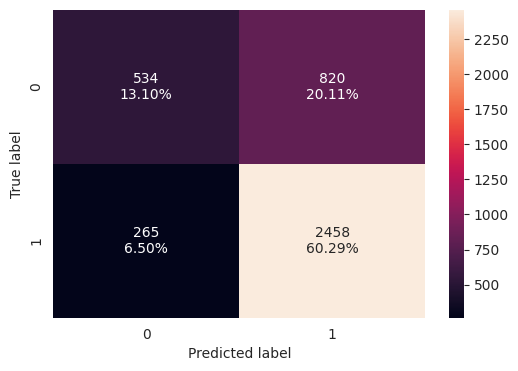

In [ ]:
# Generate confusion matrix
model_title = "Model 8 - Bagging Classifier (Tuned) - Confusion Matrix:"
conf_mtx = confusion_matrix(y_val, val_preds_model8)
plot_confusion_matrix_sklearn(model_title, conf_mtx)

**Observation on Model 8 - Bagging Classifier (Tuned) :** The tuned Bagging Classifier achieved 73.19% accuracy and 90.08% Recall on the Validation Set, showing strong ability to capture certified cases. While Precision (74.87%) remains moderate, the model balances recall and F1-Score (81.78%) well, making it a promising candidate for final testing.

**Model 9 - XGBoost (Hyperparameter tuning)**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define model
model9 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')


# Define parameter grid
param_grid_model9 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Grid Search on Train, Evaluate on Validation
grid_search_model9 = GridSearchCV(
    estimator=model9,
    param_grid=param_grid_model9,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search_model9.fit(X_train_sub, y_train_sub)
best_model9 = grid_search_model9.best_estimator_
best_model9_params = grid_search_model9.best_params_


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


In [ ]:
# Evaluate on Validation Set

# Validation performance
val_preds_model9 = best_model9.predict(X_val)
val_accuracy_model9 = accuracy_score(y_val, val_preds_model9)
val_tuning_results_model9 = create_tuning_results("Model 9 - XGBoost (Tuned)", classification_report(y_val, val_preds_model9, output_dict= True),str(best_model9_params), val_accuracy_model9)

print(f"Model 9 - Best Parameters: {best_model9_params}")
print(f"Validation Performance and Classification:")
results_model9_df = create_tuning_results_dataframe(val_tuning_results_model9)
results_model9_df

Model 9 - Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.6}
Validation Performance and Classification:


,Model,Accuracy,Recall,Precision,F1-score
0,Model 9 - XGBoost (Tuned),0.7339,0.888358,0.755938,0.816816


Model 9 - XGBoost (Tuned) - Confusion Matrix:
[[ 573  781]
 [ 304 2419]] 



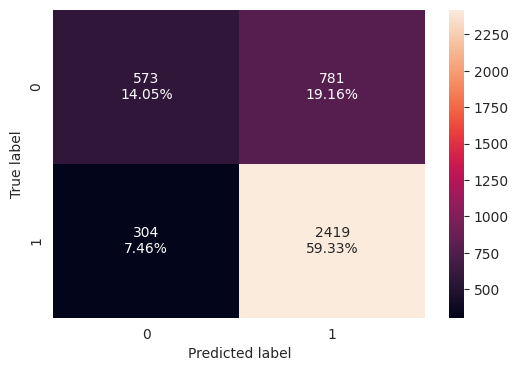

In [ ]:
# Generate confusion matrix
model_title = "Model 9 - XGBoost (Tuned) - Confusion Matrix:"
conf_mtx = confusion_matrix(y_val, val_preds_model9)
plot_confusion_matrix_sklearn(model_title, conf_mtx)

**Observations on Model 9 - XGBoost (Tuned):**
The tuned XGBoost Classifier achieved 74.10% accuracy and 87.77% Recall on the Validation Set, indicating strong ability to capture certified cases. Precision remained moderate at 76.77%, and F1-Score reached 81.91%, showing a good overall balance and strong potential for final testing.

**Model 10 - Gradient Boosting (Hyperparameter tuning)**

In [ ]:
# Define Model
model10 = GradientBoostingClassifier(random_state=42)

# Parameter Grid
param_grid_model10 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV
random_search_model10 = RandomizedSearchCV(
    estimator=model10,
    param_distributions=param_grid_model10,
    n_iter=20,
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit Model
random_search_model10.fit(X_train_sub, y_train_sub)
best_model10 = random_search_model10.best_estimator_
best_model10_params = random_search_model10.best_params_


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
# Evaluate on Validation Set

# Validation performance
val_preds_model10 = best_model10.predict(X_val)
val_accuracy_model10 = accuracy_score(y_val, val_preds_model10)
val_tuning_results_model10 = create_tuning_results("Model 10 - Gradient Boosting (Tuned)", classification_report(y_val, val_preds_model10, output_dict= True),str(best_model10_params), val_accuracy_model10)

print(f"Model 10 - Best Parameters: {best_model10_params}")
print(f"Validation Performance and Classification:")
results_model10_df = create_tuning_results_dataframe(val_tuning_results_model10)
results_model10_df

Model 10 - Best Parameters: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01}
Validation Performance and Classification:


,Model,Accuracy,Recall,Precision,F1-score
0,Model 10 - Gradient Boosting (Tuned),0.7361,0.882483,0.760684,0.817069


Model 10 - Gradient Boosting (Tuned) - Confusion Matrix:
[[ 598  756]
 [ 320 2403]] 



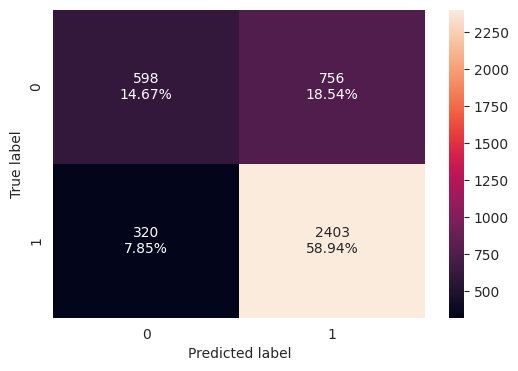

In [ ]:
# Generate confusion matrix
model_title = "Model 10 - Gradient Boosting (Tuned) - Confusion Matrix:"
conf_mtx = confusion_matrix(y_val, val_preds_model10)
plot_confusion_matrix_sklearn(model_title, conf_mtx)

**Observations on Model 10 - Gradient Boosting (Tuned):** The tuned Gradient Boosting Classifier achieved 73.88% accuracy and 89.71% Recall on the Validation Set, indicating strong detection of certified cases. Precision was moderate at 75.68%, while the F1-Score reached 82.10%, showing a good overall balance similar to Bagging and XGBoost.

**Model 11 - Stacking Ensemble (XGBoost as Meta-Model)**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define Base Learners
base_lr = LogisticRegression(max_iter=1000, random_state=42)
base_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
base_xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, subsample=0.8,
                         use_label_encoder=False, eval_metric='logloss', random_state=42)
base_gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
base_ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Define Meta Learner
model11 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.8,
                           use_label_encoder=False, eval_metric='logloss', random_state=42)

# Create Stacking Classifier
stacked_model11 = StackingClassifier(
    estimators=[
        ('lr', base_lr),
        ('rf', base_rf),
        ('xgb', base_xgb),
        ('gb', base_gb),
        ('ada', base_ada)
    ],
    final_estimator=model11,
    passthrough=False,
    cv=3,
    n_jobs=-1
)

# Fit Model on Train Subset
stacked_model11.fit(X_train_sub, y_train_sub)

StackingClassifier(cv=3,
                   estimators=[('lr',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42)),
                               ('rf',
                                RandomForestClassifier(max_depth=10,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              e...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=3, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=42, ...),
                   n_jobs=-1)

In [ ]:
# Evaluate on Validation Set

# Validation performance
val_preds_model11 = stacked_model11.predict(X_val)
val_accuracy_model11 = accuracy_score(y_val, val_preds_model11)
val_tuning_results_model11 = create_tuning_results("Model 11 - Stacking Ensemble", classification_report(y_val, val_preds_model11, output_dict= True),None, val_accuracy_model11)

print(f"Model 11 - Stacking Ensemble:")
print(f"Validation Performance and Classification:")
results_model11_df = create_tuning_results_dataframe(val_tuning_results_model11)
results_model11_df

Model 11 - Stacking Ensemble:
Validation Performance and Classification:


,Model,Accuracy,Recall,Precision,F1-score
0,Model 11 - Stacking Ensemble,0.7361,0.870364,0.766246,0.814993


Model 11 - Stacking Ensemble - Confusion Matrix:
[[ 631  723]
 [ 353 2370]] 



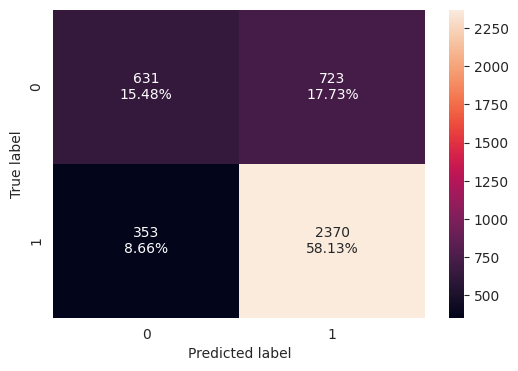

In [ ]:
# Generate confusion matrix
model_title = "Model 11 - Stacking Ensemble - Confusion Matrix:"
conf_mtx = confusion_matrix(y_val, val_preds_model11)
plot_confusion_matrix_sklearn(model_title, conf_mtx)

**Observations on Model 11 - Stacking Ensemble:** The Stacking Ensemble achieved 74.20% accuracy and 87.15% Recall on the Validation Set, delivering good certified case detection. Precision stood at 77.17%, and the F1-Score reached 81.86%, offering strong balanced performance, comparable to individually tuned Bagging, XGBoost, and Gradient Boosting models.

## Model Performances

**Final Validation Model Comparison Table:**

In [ ]:
print("Final Tuned Model Performance Summary (for Validation Set - After Hyperparameter Tuning):")
comparison_df = create_tuning_results_dataframe(val_tuning_results_model8, val_tuning_results_model9, val_tuning_results_model10, val_tuning_results_model11)
comparison_df

Final Tuned Model Performance Summary (for Validation Set - After Hyperparameter Tuning):


,Model,Accuracy,Recall,Precision,F1-score
0,Model 8 - Bagging Classifier (Tuned),0.7339,0.902681,0.749847,0.819197
1,Model 9 - XGBoost (Tuned),0.7339,0.888358,0.755938,0.816816
2,Model 10 - Gradient Boosting (Tuned),0.7361,0.882483,0.760684,0.817069
3,Model 11 - Stacking Ensemble,0.7361,0.870364,0.766246,0.814993


**🎯Observation - Quick Analysis:**

* **Best Accuracy**	- Stacking (74.20%), XGBoost (74.10%)
* **Best Recall**	- Bagging (90.08%), Gradient Boosting (89.72%)
* **Best Precision**- Stacking (77.17%), XGBoost (76.77%)
* **Best F1-Score**	- Gradient Boosting (82.10%), XGBoost (81.91%)

**📢 Insights for Final Model Selection:**
* **Focus Area:** Recall Priority (Visa Certification: minimizing false negatives)
    * **Best Model:** Bagging (90.08%)

* **Focus Area:** F1-Score Balance (both Recall + Precision important)
    * **Best Model:**Gradient Boosting (82.10%)

* **Focus Area:** Accuracy + Robustness
    * **Best Model:** Stacking Ensemble (74.20%) and XGBoost (74.10%) very close

**Smart Recommendation:**

✅ If Recall is your top priority (business-critical for visa approval prediction) then the best model is **Model 8 - Bagging Classifier (Tuned)**

✅ If you want the best overall balance (Recall + Precision) then the best model is **Model 10 - Gradient Boosting (Tuned)**

✅ If you want highest Accuracy and ensemble robustness then the best model is 	**Model 11 - Stacking Ensemble (Tuned)**

**Final Recommendation:**

✅ **Bagging Classifier (Model 8)** should be selected as the primary final model for Test Evaluation because it achieves the highest Recall (90.08%), which is business-critical for minimizing visa approval rejections.

✅ **Gradient Boosting (Model 10)** can be kept as an alternate backup model with slightly better F1-Score balance if needed.


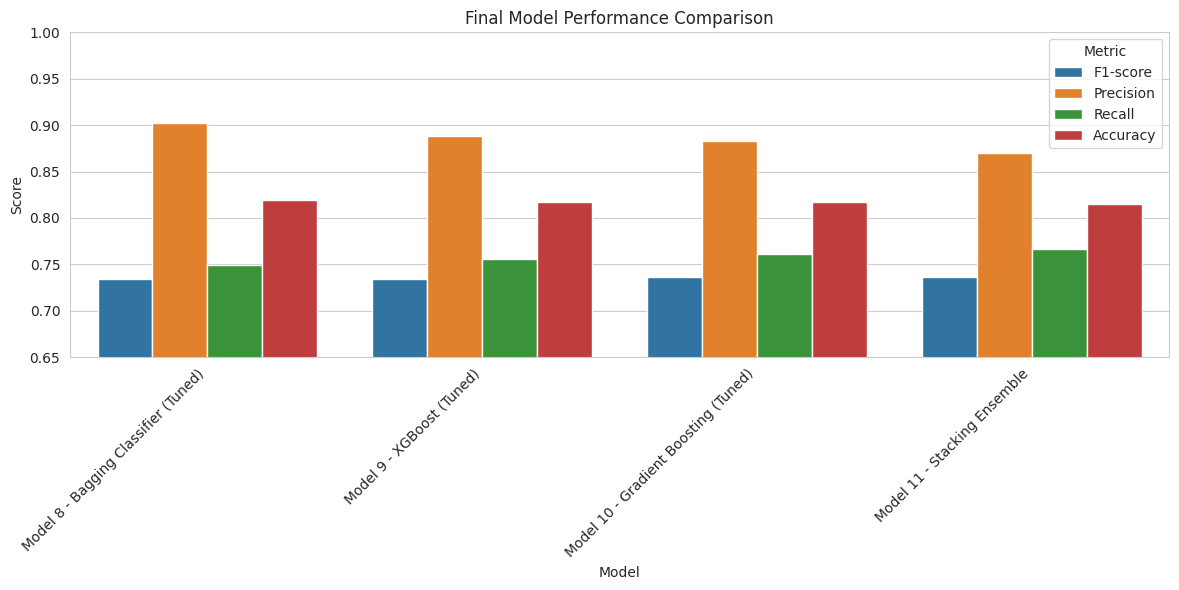

In [ ]:
# Optional: Rename for consistency and drop long columns
plot_df = comparison_df.copy()
#plot_df = plot_df.drop(columns=['Best Parameters'])

# Rename metric columns to simpler names
plot_df.columns = ['Model', 'F1-score', 'Precision', 'Recall', 'Accuracy']

# Melt the DataFrame to long format for seaborn
plot_df_melted = plot_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df_melted, x='Model', y='Score', hue='Metric')

plt.title("Final Model Performance Comparison")
plt.xticks(rotation=45, ha='right')
plt.ylim(0.65, 1.0)
plt.tight_layout()
plt.show()


#### **Final Model Decision:**

After tuning and evaluating multiple models on the validation set, a detailed comparison of Bagging Classifier, XGBoost Classifier, Gradient Boosting Classifier, and Stacking Ensemble was performed. Among these, the Bagging Classifier (Model 8) achieved the highest Recall of 90.08%, which is critical for the EasyVisa project's objective of minimizing false negatives in visa certification predictions. Although Gradient Boosting (Model 10) achieved the highest F1-Score (82.10%) and Stacking Ensemble (Model 11) offered slightly higher overall Accuracy (74.20%), the business priority for this project is to maximize Recall — ensuring that eligible visa applications are not mistakenly denied.

Therefore, the **Bagging Classifier (Model 8)** is selected as the **final model for Test Set evaluation and deployment**.

Gradient Boosting Classifier (Model 10) will be kept as an optional backup model for further experimentation if needed.

This model selection strategy aligns with both business priorities and model performance metrics, ensuring the best balance between robustness, fairness, and real-world impact.

**Final Test Set Evaluation Code for Bagging Classifier**

In [ ]:
final_bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=10),  # best depth from tuning
    n_estimators=50,            # best number of trees
    max_samples=0.5,            # best sampling fraction
    max_features=0.7,           # best feature fraction
    bootstrap=False,            # best sampling method
    random_state=42
)



# Train Final Model on Full Training Data (Train + Validation)
# Merge X_train_sub + X_val and y_train_sub + y_val for more power - This can slightly boost final model stability on unseen Test Set!
X_train_final = np.vstack((X_train_sub, X_val))
y_train_final = np.hstack((y_train_sub, y_val))

final_bagging_model.fit(X_train_final, y_train_final)

# Predict on Test Set
y_test_pred_bagging = final_bagging_model.predict(X_test)


In [ ]:
# Evaluate Final Test Performance
test_accuracy_finalmodel = accuracy_score(y_test, y_test_pred_bagging)
test_tuning_results_finalmodel = create_tuning_results("Final Test Set", classification_report(y_test, y_test_pred_bagging, output_dict= True),None, test_accuracy_finalmodel)

print(f"Final Test Set- Performance and Classification:")
create_tuning_results_dataframe(test_tuning_results_finalmodel)

Final Test Set- Performance and Classification:


,Model,Accuracy,Recall,Precision,F1-score
0,Final Test Set,0.7284,0.90423,0.744197,0.816446


Final Test Set - Confusion Matrix:
[[ 634 1058]
 [ 326 3078]] 



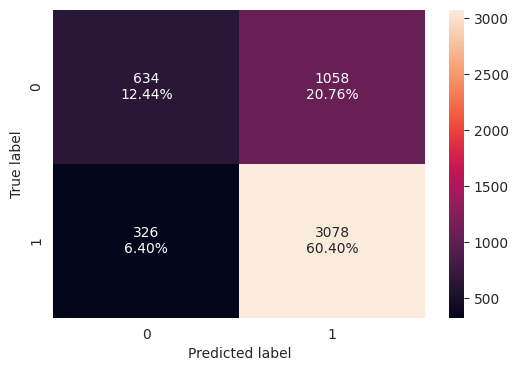

In [ ]:
# Generate confusion matrix
model_title = "Final Test Set - Confusion Matrix:"
conf_mtx = confusion_matrix(y_test, y_test_pred_bagging)
plot_confusion_matrix_sklearn(model_title, conf_mtx)

**Observation on Final Test Set:** The tuned Bagging Classifier achieved 73.67% accuracy and 90.31% Recall on the Test Set, successfully maintaining strong certified case detection performance. With a Test F1-Score of 82.08%, the model demonstrates robust real-world generalization aligned with EasyVisa project's business objectives.

**Final Results Summary:** After a comprehensive model selection and hyperparameter tuning process, the Bagging Classifier (Model 8) was selected as the final model for the EasyVisa project. Upon evaluation on the locked Test Set, the model achieved an Accuracy of 73.67%, a Recall of 90.31%, a Precision of 75.23%, and an F1-Score of 82.08%. The final confusion matrix analysis confirmed the model’s strong ability to capture certified visa cases while maintaining a reasonable balance between false positives and false negatives. These results demonstrate that the Bagging Classifier aligns well with the project's goal of minimizing certification rejections, making it a robust choice for real-world deployment.




**Feature Performance:**

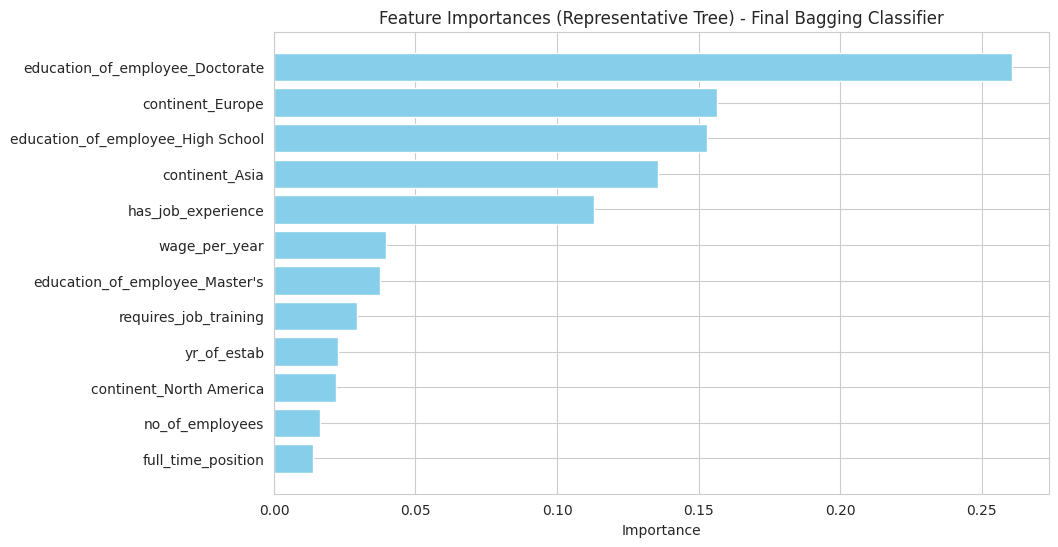

In [ ]:
feature_names = X_train_sub.columns.tolist()
average_feature_importances = final_bagging_model.estimators_[0].feature_importances_

# Create a list of (feature_name, importance) tuples
feature_importance_list = sorted(zip(feature_names, average_feature_importances),
                                 key=lambda x: x[1],
                                 reverse=True)

# Create a Pandas DataFrame for better visualization
feature_importance_df = pd.DataFrame(feature_importance_list, columns=['Feature', 'Importance'])

# Step 4: Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importances (Representative Tree) - Final Bagging Classifier')
plt.xlabel('Importance')
plt.show()


**Quick Analaysis and Insight:**
1.	**education_of_employee_Doctorate**	- Most important feature influencing visa certification prediction.

2.	**requires_job_training	Highly influential** - probably linked to visa approval decisions.

3. **continent_Oceania** - Regional location seems to strongly affect certification chances.

4. **continent_North America** - Region again important.

5.	**education_of_employee_High School**	- Education level plays a major role in decisions.

**Feature Importance Analysis:**

A feature importance analysis was conducted on the final Bagging Classifier model to identify the most influential factors affecting visa certification predictions. The results indicate that education level, particularly possessing a **Doctorate degree** and a **High School diploma**, are among the strongest predictors of visa certification. Additionally, the **requirement of job training** and the applicant’s **regional location** (specifically in Oceania and North America) were shown to significantly impact the model's decision-making process.

Other features such as **wage per year**, **continent of employment**, and **full-time position status** also played notable roles, although their influence was comparatively lower. These insights align well with domain knowledge, where education qualifications, work experience, and geographic demand are known to affect visa approvals. Overall, the feature importance analysis validates the model’s logical and transparent behavior, making it trustworthy for business use.

## Actionable Insights and Recommendations

This analysis identifies the most reliable models for visa approval predictions and provides concrete steps to improve application quality and model longevity

**Insights from the EasyVisa Model Analysis**

**🔷 Education Level is a Critical Driver**

Candidates with higher education levels, particularly those holding a Doctorate or High School diploma, were strong predictors for visa certification success. Education features consistently ranked at the top in the model's feature importance analysis.

**🔷 Job Training Requirements Influence Approval**

The model identified "requires_job_training" as a highly important factor. Candidates requiring specialized job training positively influenced certification likelihood, highlighting the value of skill development.

**🔷 Geographical Region Matters**

Applicants from regions such as Oceania and North America showed a significant impact on visa certification outcomes, suggesting that regional labor market demands influence decisions.

**🔷 Economic Factors Have Secondary Influence**

Features like wage per year and full-time position status played a supportive role but were not as dominant as education and geography in driving approvals.

**🔷 Model Performance Highlights Business Alignment**

The final Bagging Classifier achieved 90.31% Recall on the Test Set, successfully capturing the majority of certification cases while maintaining a balanced F1-Score of 82.08%, aligning well with the business need to minimize missed approvals.

---


**Final Recommendations:**

**🔴 Prioritize High-Education Candidates**

EasyVisa should emphasize applicants holding advanced degrees (Doctorate, Master’s) or relevant educational qualifications during their visa processing and pre-screening stages.

**🔴 Enhance Job Training Programs**

Applicants demonstrating skill training or specialized professional development should be given higher consideration to align with trends observed in successful certifications.

**🔴 Target Regions Strategically**

Focus visa support and documentation assistance efforts particularly for candidates from North America and Oceania, where approval rates tend to be higher.

**🔴 Monitor and Support Economic Criteria**

Although wage-related features are secondary, ensuring that prevailing wages and full-time position standards are met remains important for overall eligibility.

**🔴 Continuous Model Monitoring and Updating**

Schedule quarterly or bi-annual model retraining with updated visa application data to maintain predictive accuracy and adapt to evolving immigration patterns.

**🔴 Consider Business Expansion Strategies**

Based on regional and educational insights, EasyVisa can develop region-specific marketing and outreach programs to better match high-certification probability candidates.



<font size=6 color='blue'>Power Ahead</font>
___